<a href="https://colab.research.google.com/github/LavleenPDekatey/Regression-Retail-sales/blob/main/Retail_sales_prediction_by_regression_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Individual (Lavleen Prabhakar Dekatey)


# **Project Summary -**

Rossman operates over 3000 drug stores in 7 European countries. Currently rossmann store are tasked with predicting their daily sales of upto six weeks in advance. Store sales are influenced by many factor, including promotions, competition, school and state holidays, seasonality and locality. With thousand of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 rossmann stores. The task is to forecast the sales column for the test set.

# **GitHub Link -**

https://github.com/LavleenPDekatey/Regression-Retail-sales.git

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

It is good to have retail sales prediction in advance as it can help us to be prepared for handling customers, making stock available of different assortment and prepare marketing strategy according to store type for incase having predicted shortfall of customers.

In retail industry, customer have wide variety of choices of brand and medium of buying the product. So to attract the customers towards our brand is challenging in this competitive market and for which we need to have an insight of basis for gaining and retaining customers.

In this project we will analyse customer level data of historical sales of our brand stores to have an idea of what are the parameters which are responsible for sales.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import date
from scipy import stats
from scipy.stats import norm

### Dataset Loading

In [3]:
# Load Dataset
rossmann_store='/content/drive/MyDrive/Almabetter Data science/Projects/project 2/Rossmann Stores Data.csv'
store='/content/drive/MyDrive/Almabetter Data science/Projects/project 2/store.csv'

rossman_df=pd.read_csv(rossmann_store)
store_df=pd.read_csv(store)

### Dataset First View

In [4]:
# Dataset First Look\
pd.set_option('display.max_columns',None)
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
store_df.shape

(1115, 10)

In [7]:
rossman_df.shape

(1017209, 9)

### Dataset Information

In [8]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(store_df[store_df.duplicated()])

0

In [11]:
len(rossman_df[rossman_df.duplicated()])

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print(store_df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [13]:
print(rossman_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


<Axes: >

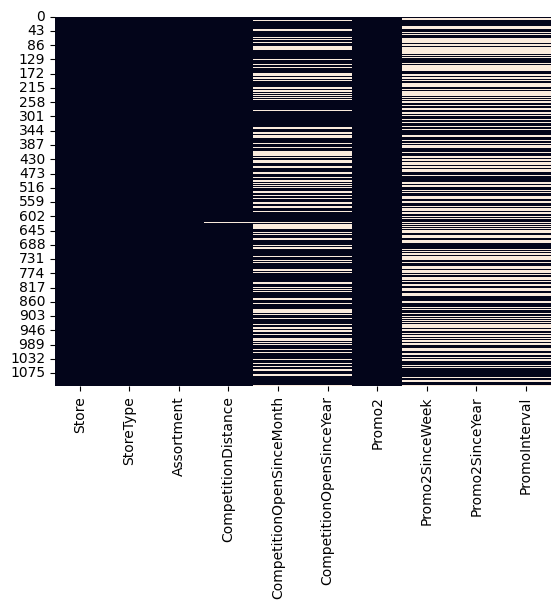

In [14]:
# Visualizing the missing values
sns.heatmap(store_df.isnull(),cbar=False)

### What did you know about your dataset?

The dataset given is a historical data of 1,115 Rossmann store. We have to forecast sales of these rossmann stores.

Retail sales prediction is the analytical study of gaining insights from graph about what parameter are affecting the sales.

There are two datasets given from which one is store_df which has 1115 rows and 10 columns and other one is rossman_df which has 1017209 rows and 9 columns. There are no duplicate values in both dataset and no missing values in rossman_df but there are missing values in store_df.


## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [17]:
# Dataset Describe
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [18]:
rossman_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


### Variables Description

* **Id :**Unique entry id

* **Store :**Store id

* **Sales :**Sales made for the day

* **Customers :**Footfall for the day

* **Open :**Open or closed

* **State holiday :**State holiday or not

* **School holiday :**School holiday or not

* **Store type :**Type of stores

* **Assortment :**Type of assortment

* **Competition distance :**Distance from the nearest competition

* **Promo :**Store running promotion or not

* **Promo2 :**Store running consecutive promotion or not

* **DayOfWeek :**Day number of week

* **Date :**Date of sales

* **CompetitionOpenSinceMonth :**Competition open since which month of the year

* **CompetitionOpenSinceYear :**Competition open since which year

* **Promo2SinceWeek :** Promo2 is open since which week of the year

* **Promo2SinceYear :** Promo 2 is open since which week of the year

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
for i in store_df.columns.tolist():
  print("No. of unique values in ",i,"is",store_df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


In [20]:
for i in rossman_df.columns.tolist():
  print("No. of unique values in ",i,"is",rossman_df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset rossman_df and assign to rossman_df1.
rossman_df1=rossman_df.copy()
#removing the data of stores which are closed for the day.
rossman_df1=rossman_df1.drop(rossman_df1[rossman_df1['Open']==0].index)
#We dropped the open column
rossman_df1=rossman_df1.drop(['Open'],axis=1)
#Dataset rows and column count.
rossman_df1.shape

(844392, 8)

In [22]:
#From date column taking out year and month value and assigning it to year and month list and also converted the date to weeknumber
# and made a column for that number as week_numbers.
lst=[]
year_lst=[]
month_lst=[]
for i in rossman_df1['Date']:
   a=datetime.strptime(i,'%Y-%m-%d')
   week_number=datetime.date(a).strftime("%U")
   lst.append(week_number)
   year_lst.append(i[0:4])
   month_lst.append(i[5:7])
rossman_df1['week_numbers']=lst

In [23]:
#Made a column as year and month from year and month list
rossman_df1['year']=year_lst
rossman_df1['month']=month_lst

In [24]:
#Sales data groupby store and year
yearly_sales_of_store0=rossman_df1.groupby(['Store','year'])['Sales'].sum().unstack()
yearly_sales_of_store0

year,2013,2014,2015
Store,,,
1,1491140,1433408,792306
2,1488164,1516432,879262
3,2128265,2072949,1207047
4,2852667,2971989,1731851
5,1420228,1406465,816125
...,...,...,...
1111,1645177,1587030,858869
1112,3433630,2926635,1614029
1113,1988864,2043271,1164107


In [25]:
#categorised sales according to year
sales_2013=rossman_df1['Sales'][rossman_df1['year']=='2013']
sales_2014=rossman_df1['Sales'][rossman_df1['year']=='2014']
sales_2015=rossman_df1['Sales'][rossman_df1['year']=='2015']

In [26]:
#Calculating 25th and 75th percentile of sales according to year
a_2013_25percentile=np.percentile(sales_2013,25)
a_2013_75percentile=np.percentile(sales_2013,75)
b_2014_25percentile=np.percentile(sales_2014,25)
b_2014_75percentile=np.percentile(sales_2014,75)
c_2015_25percentile=np.percentile(sales_2015,25)
c_2015_75percentile=np.percentile(sales_2015,75)

In [27]:
#calculating average 75th percentile of sales
avg_75percentile=(a_2013_75percentile+b_2014_75percentile+c_2015_75percentile)/3
avg_75percentile

8378.0

In [28]:
#Calculating average 25th percentile of sales
avg_25percentile=(a_2013_25percentile+b_2014_25percentile+c_2015_25percentile)/3
avg_25percentile

4888.0

In [29]:
#Calculating interquartile range
IQR=avg_75percentile-avg_25percentile
IQR

3490.0

In [30]:
#Calculating max of interquartile
max_of_IQR=avg_75percentile+1.5*IQR
max_of_IQR

13613.0

In [31]:
#Calculating min of interquartile
min_of_IQR=avg_25percentile-1.5*IQR
min_of_IQR

-347.0

In [32]:
#removed the outlier in sales whose value is above 14000 and assigned to rossman_df2
rossman_df2=rossman_df1.drop(rossman_df1[rossman_df1['Sales']>14000].index)

In [33]:
#number of rows and columns in rossman_df2
rossman_df2.shape

(817279, 11)

In [34]:
#number of rows and columns in rossman_df1
rossman_df1.shape

(844392, 11)

In [35]:
#Sales dataset groupby store and year in rossman_df2 dataset in which we have removed the outlier above the max of IQR value.
yearly_sales_of_store=rossman_df2.groupby(['Store','year'])['Sales'].sum().unstack()
yearly_sales_of_store

year,2013,2014,2015
Store,,,
1,1491140.0,1433408.0,792306.0
2,1488164.0,1516432.0,879262.0
3,2084602.0,2057260.0,1207047.0
4,2697481.0,2819634.0,1668965.0
5,1420228.0,1406465.0,816125.0
...,...,...,...
1111,1645177.0,1587030.0,858869.0
1112,2371785.0,2490546.0,1398917.0
1113,1972749.0,2029059.0,1164107.0


In [36]:
#Sales data groupby month of each year
monthly_sales=rossman_df1.groupby(['year','month'])['Sales'].sum().unstack()
monthly_sales

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2013,180132207.0,171534275.0,201180369.0,183431432.0,185411063.0,180702351.0,208843882.0,198042727.0,178053963.0,187662330.0,196170924.0,231710561.0
2014,187752787.0,178924677.0,193019854.0,194544977.0,194693257.0,190047051.0,173892707.0,163748475.0,164516168.0,164216398.0,173327953.0,202120592.0
2015,198843730.0,178275458.0,205631683.0,197918886.0,189143897.0,207363373.0,212322616.0,NaN,NaN,NaN,NaN,NaN


In [37]:
#finding out the max value in customers column in rossman_df1 dataset. So that we are able to categorize
#customer in slots upto this value
rossman_df1['Customers'].max()

7388

In [38]:
#finding out the max value in customers column in rossman_df2 dataset.
rossman_df2['Customers'].max()

4256

In [39]:
#categorizing customer in categories according to number of customers for the day and by making it a column.
#So as to make the data more easy to interpret.
customer_slot_category=[]
for i in rossman_df1['Customers']:
  if (i>=0)&(i<500):
    customer_slot_category.append('a')
  elif (i>=500)&(i<1000):
    customer_slot_category.append('b')
  elif (i>=1000)&(i<1500):
    customer_slot_category.append('c')
  elif (i>=1500)&(i<2000):
    customer_slot_category.append('d')
  elif (i>=2000)&(i<2500):
    customer_slot_category.append('e')
  elif (i>=2500)&(i<3000):
    customer_slot_category.append('f')
  elif (i>=3000)&(i<3500):
    customer_slot_category.append('g')
  elif (i>=3500)&(i<4000):
    customer_slot_category.append('h')
  elif (i>=4000)&(i<4500):
    customer_slot_category.append('i')
  elif (i>=4500)&(i<5000):
    customer_slot_category.append('j')
  elif (i>=5000)&(i<5500):
    customer_slot_category.append('k')
  elif (i>=5500)&(i<6000):
    customer_slot_category.append('l')
  elif (i>=6000)&(i<6500):
    customer_slot_category.append('m')
  elif (i>=6500)&(i<7000):
    customer_slot_category.append('n')
  elif (i>=7000)&(i<7500):
    customer_slot_category.append('o')
  else:
    pass
rossman_df1['customer_slot_category']=customer_slot_category
rossman_df1['customer_slot_category'].value_counts()

b    511141
a    185154
c    111151
d     22192
e      7137
f      3410
g      2881
h      1007
i       232
j        68
k        18
o         1
Name: customer_slot_category, dtype: int64

In [40]:
#Sales data groupby year and customer_slot_category and assign it to customer slot category variable.
#and also fill the null values with 0.
customer_slot_category_sales=rossman_df1.groupby(['year','customer_slot_category'])['Sales'].sum().unstack().fillna(0)
customer_slot_category_sales

customer_slot_category,a,b,c,d,e,f,g,h,i,j,k,o
year,,,,,,,,,,,,
2013,316815065.0,1.323909e+09,441900730.0,119618787.0,48867072.0,20385094.0,19034454.0,8245859.0,2955404.0,882338.0,235372.0,27190.0
2014,259044162.0,1.278432e+09,435507560.0,113058781.0,41206723.0,21553516.0,20778780.0,8268163.0,2003432.0,712102.0,239506.0,0.0
2015,180827492.0,8.478748e+08,248915870.0,58674183.0,22413506.0,13572423.0,12084829.0,3635354.0,913956.0,437997.0,149228.0,0.0


In [41]:
#We have got b customer slot category with maximum sales in each year.
#So we will take the data with b customer category and assign it to customer_slot_category_sales_b
customer_slot_category_sales_b=rossman_df1[rossman_df1['customer_slot_category']=='b']
customer_slot_category_sales_b

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category
0,1,5,2015-07-31,5263,555,1,0,1,30,2015,07,b
1,2,5,2015-07-31,6064,625,1,0,1,30,2015,07,b
2,3,5,2015-07-31,8314,821,1,0,1,30,2015,07,b
4,5,5,2015-07-31,4822,559,1,0,1,30,2015,07,b
5,6,5,2015-07-31,5651,589,1,0,1,30,2015,07,b
...,...,...,...,...,...,...,...,...,...,...,...,...
1016588,494,2,2013-01-01,3113,527,0,a,1,00,2013,01,b
1016606,512,2,2013-01-01,2646,625,0,a,1,00,2013,01,b
1016624,530,2,2013-01-01,2907,532,0,a,1,00,2013,01,b
1016770,676,2,2013-01-01,3821,777,0,a,1,00,2013,01,b


In [42]:
#Sales dataset of b customer category groupby month of year and assign it to customer_slot_category_sales_b_graph variable.
customer_slot_category_sales_b_graph=customer_slot_category_sales_b.groupby(['year','month'])['Sales'].sum().unstack()
customer_slot_category_sales_b_graph

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2013,105078105.0,99005667.0,112098515.0,106526914.0,108360940.0,107855225.0,121145358.0,115856902.0,107153771.0,111924996.0,117550564.0,111351762.0
2014,113612040.0,107746216.0,113288567.0,112015005.0,116422992.0,111543004.0,104781968.0,97326890.0,98667858.0,99303637.0,103187430.0,100536564.0
2015,123592220.0,110146450.0,124992729.0,116427648.0,115829637.0,124436245.0,132449876.0,NaN,NaN,NaN,NaN,NaN


In [43]:
#looking into the state holiday column which all values are available and its count.
rossman_df1['StateHoliday'].value_counts()

0    731342
0    112140
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [44]:
#We came to know there are 0 of two type, one is a string and other is int.
#we are puting string 0 in place of int zero so as to make it categorical.
State_holiday1=[]
for num,elem in rossman_df1.iterrows():
  if elem['StateHoliday']=='0':
    State_holiday1.append('0')
  elif elem['StateHoliday']==0:
    State_holiday1.append('0')
  elif elem['StateHoliday']=='a':
    State_holiday1.append('a')
  elif elem['StateHoliday']=='b':
    State_holiday1.append('b')
  else:
    State_holiday1.append('c')
rossman_df1['StateHoliday']=State_holiday1
rossman_df1['StateHoliday'].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [45]:
#now again checking the count of each values
rossman_df1['StateHoliday'].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [46]:
#Sales dataset groupby year and state holiday categories and assign it to state_holiday_related_sales variable.
state_holiday_related_sales=rossman_df1.groupby(['year','StateHoliday'])['Sales'].sum().unstack().fillna(0)
state_holiday_related_sales

StateHoliday,0,a,b,c
year,,,,
2013,2.300037e+09,2052408.0,454997.0,331182.0
2014,2.177896e+09,2084616.0,463353.0,360624.0
2015,1.387231e+09,1753281.0,515394.0,0.0


In [47]:
#Sales dataset groupby year and school holiday and assign it to school_holiday_related_sales variable
school_holiday_related_sales=rossman_df1.groupby(['year','SchoolHoliday'])['Sales'].sum().unstack().fillna(0)
school_holiday_related_sales

SchoolHoliday,0,1
year,,
2013,1823418939,479457145
2014,1727215654,453589242
2015,1145625938,243873705


In [48]:
#Sales dataset groupby year, State holiday and School holiday and assign it to state_school_holiday_related_sales variable
state_school_holiday_related_sales=rossman_df1.groupby(['year','StateHoliday','SchoolHoliday'])['Sales'].sum().unstack().fillna(0)
state_school_holiday_related_sales

SchoolHoliday                 0            1
year StateHoliday                           
2013 0             1.821775e+09  478262681.0
     a             1.574570e+06     477838.0
     b             6.955300e+04     385444.0
     c             0.000000e+00     331182.0
2014 0             1.725264e+09  452631876.0
     a             1.884470e+06     200146.0
     b             6.675700e+04     396596.0
     c             0.000000e+00     360624.0
2015 0             1.144002e+09  243228686.0
     a             1.551279e+06     202002.0
     b             7.237700e+04     443017.0

In [49]:
#Sales dataset groupby month, promo given and customer slot category and assign it to promo1_related_sales_monthly variable.
#this grouping we have done to capture the seasonality of Sales
promo0_related_sales_monthly=rossman_df1.groupby(['month','Promo','customer_slot_category'])['Sales'].sum().unstack().fillna(0)
promo0_related_sales_monthly

customer_slot_category           a            b           c           d  \
month Promo                                                               
01    0                 61529449.0  156644400.0  33142206.0   9037423.0   
      1                 26555299.0  185637965.0  61872830.0  13863033.0   
02    0                 55868801.0  160314690.0  34398570.0   9647780.0   
      1                 23619197.0  156583643.0  56288068.0  12841376.0   
03    0                 54867084.0  153051363.0  32784454.0   9926037.0   
      1                 24254796.0  197328448.0  83417006.0  19852951.0   
04    0                 50432797.0  150498042.0  35272109.0  10232630.0   
      1                 19740727.0  184471525.0  81335883.0  18826794.0   
05    0                 45196250.0  164789577.0  43152091.0  11658837.0   
      1                 20401797.0  175823992.0  67550707.0  15403398.0   
06    0                 57108336.0  166642368.0  33152666.0   9689214.0   
      1                 18196001.0  177192106.0  75133336.0  16684668.0   
07    0                 55651434.0  151309374.0  31461408.0   8381196.0   
      1                 23284400.0  207067828.0  75876723.0  18441117.0   
08    0                 38027755.0  100925621.0  23194297.0   6927174.0   
      1                 12926951.0  112258171.0  42524883.0  10834909.0   
09    0                 34926981.0   98563720.0  20225920.0   5983900.0   
      1                 12371922.0  107257909.0  40375118.0   9427139.0   
10    0                 34014833.0  106206612.0  25477499.0   7367355.0   
      1                 13988760.0  105022021.0  36517386.0   8739063.0   
11    0                 27819868.0   97561595.0  24352290.0   7341808.0   
      1                 13490992.0  123176399.0  48645971.0  11161851.0   
12    0                 27079870.0  110614667.0  49019295.0  17423989.0   
      1                  5332419.0  101273659.0  71153444.0  21658109.0   

customer_slot_category          e          f          g          h         i  \
month Promo                                                                    
01    0                 3433702.0  2778749.0  1496303.0   600807.0       0.0   
      1                 5026602.0  2473564.0  2234436.0   342503.0   32263.0   
02    0                 3503433.0  3025050.0  1869581.0   613566.0  359690.0   
      1                 4929419.0  2166855.0  1907147.0   749452.0   48092.0   
03    0                 3762779.0  2990626.0  2216342.0   449773.0  220324.0   
      1                 7157608.0  3298618.0  2993785.0   880067.0  195796.0   
04    0                 4352099.0  2245493.0  2526269.0   838977.0  304350.0   
      1                 7160402.0  2862887.0  2661408.0  1475639.0  406683.0   
05    0                 4849971.0  2737266.0  2767829.0  1188971.0  324909.0   
      1                 6092699.0  2595415.0  2375855.0  1325763.0  395862.0   
06    0                 3953385.0  2582402.0  2717032.0   847479.0  312913.0   
      1                 6474917.0  2592441.0  2634200.0  1586544.0  325559.0   
07    0                 3835847.0  1885069.0  2905633.0   564405.0   37408.0   
      1                 7016702.0  2472115.0  2861192.0  1299653.0  350640.0   
08    0                 2729605.0  1445611.0  1665109.0   494515.0  126042.0   
      1                 3884422.0  1353654.0  1330851.0   773513.0  100457.0   
09    0                 2581576.0  1750126.0  1430389.0   336058.0  141298.0   
      1                 3693618.0  1321360.0  1802905.0   300393.0   17000.0   
10    0                 3154279.0  1726769.0  1970075.0   290922.0  303137.0   
      1                 3191654.0  1490861.0  1781091.0   513814.0   52526.0   
11    0                 2939362.0  1975575.0  1644178.0   641063.0  241965.0   
      1                 3919141.0  1680653.0  2226573.0   540311.0   71925.0   
12    0                 6771580.0  3263313.0  2106420.0  1236007.0  801422.0   
      1                 8072499.0  2796561.0  177

In [50]:
#Sales dataset groupby year, promo and customer slot category and assign it to promo0_related_sales_yearly variable.
#And filled the null value with 0.
promo0_related_sales_yearly=rossman_df1.groupby(['year','Promo','customer_slot_category'])['Sales'].sum().unstack().fillna(0)
promo0_related_sales_yearly

customer_slot_category            a            b            c           d  \
year Promo                                                                  
2013 0                  226382614.0  637056637.0  159750626.0  47996575.0   
     1                   90432451.0  686852082.0  282150104.0  71622212.0   
2014 0                  191116493.0  601062708.0  145325362.0  43091127.0   
     1                   67927669.0  677369463.0  290182198.0  69967654.0   
2015 0                  125024351.0  379002684.0   80556817.0  22529641.0   
     1                   55803141.0  468872121.0  168359053.0  36144542.0   

customer_slot_category           e           f           g          h  \
year Promo                                                              
2013 0                  20462520.0  10565125.0  10022011.0  3268630.0   
     1                  28404552.0   9819969.0   9012443.0  4977229.0   
2014 0                  16662181.0  11123845.0   9727204.0  3277347.0   
     1                  24544542.0  10429671.0  11051576.0  4990816.0   
2015 0                   8742917.0   6717079.0   5565945.0  1556566.0   
     1                  13670589.0   6855344.0   6518884.0  2078788.0   

customer_slot_category          i         j         k        o  
year Promo                                                      
2013 0                  1225761.0  742690.0  165994.0      0.0  
     1                  1729643.0  139648.0   69378.0  27190.0  
2014 0                  1382510.0  660088.0  167895.0      0.0  
     1                   620922.0   52014.0   71611.0      0.0  
2015 0                   565187.0  405185.0   72022.0      0.0  
     1                   348769.0   32812.0   77206.0      0.0

In [51]:
#above we have seen that yearly sales is always greater when the customer slot category is b.
#So collecting the customer slot category b data and assigning it to rossman_df2_b_customers variable.
rossman_df1_b_customers=rossman_df1[rossman_df1['customer_slot_category']=='b']
rossman_df1_b_customers

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category
0,1,5,2015-07-31,5263,555,1,0,1,30,2015,07,b
1,2,5,2015-07-31,6064,625,1,0,1,30,2015,07,b
2,3,5,2015-07-31,8314,821,1,0,1,30,2015,07,b
4,5,5,2015-07-31,4822,559,1,0,1,30,2015,07,b
5,6,5,2015-07-31,5651,589,1,0,1,30,2015,07,b
...,...,...,...,...,...,...,...,...,...,...,...,...
1016588,494,2,2013-01-01,3113,527,0,a,1,00,2013,01,b
1016606,512,2,2013-01-01,2646,625,0,a,1,00,2013,01,b
1016624,530,2,2013-01-01,2907,532,0,a,1,00,2013,01,b
1016770,676,2,2013-01-01,3821,777,0,a,1,00,2013,01,b


In [52]:
#Sales dataset groupby year, month and promo and assign it to year_month_promo_sales variable.
year_month_promo_sales=rossman_df1_b_customers.groupby(['year','month','Promo'])['Sales'].sum().unstack()
year_month_promo_sales

Promo              0         1
year month                    
2013 01     54597675  50480430
     02     49551961  49453706
     03     40702566  71395949
     04     46417232  60109682
     05     48197368  60163572
     06     57711909  50143316
     07     50395607  70749751
     08     53173379  62683523
     09     54094665  53059106
     10     60297211  51627785
     11     64605181  52945383
     12     57311883  54039879
2014 01     60341882  53270158
     02     54202719  53543497
     03     55898880  57389687
     04     51408286  60606719
     05     57138715  59284277
     06     52775444  58767560
     07     44906886  59875082
     08     47752242  49574648
     09     44469055  54198803
     10     45909401  53394236
     11     32956414  70231016
     12     53302784  47233780
2015 01     41704843  81887377
     02     56560010  53586440
     03     56449917  68542812
     04     52672524  63755124
     05     59453494  56376143
     06     56155015  68281230
     07     56006881  76442995

In [53]:
#merge the two dataset rossman_df1 and store_df
store_join1=pd.merge(rossman_df1, store_df,on='Store', how='outer')

In [54]:
store_join1

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,01,2013,01,c,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844388,292,6,2013-01-05,2748,340,0,0,0,00,2013,01,a,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844389,292,5,2013-01-04,4202,560,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844390,292,4,2013-01-03,4580,662,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN


In [55]:
#Sales dataset groupby competition distance and assign it to Sales_competion_distance variable
Sales_competion_distance=store_join1.groupby(['CompetitionDistance'])['Sales'].sum()
Sales_competion_distance

CompetitionDistance
20.0        4579807
30.0       17552666
40.0       29261626
50.0       60835848
60.0       22088359
             ...   
45740.0     6261174
46590.0     3554993
48330.0     3798660
58260.0     5718883
75860.0     6896821
Name: Sales, Length: 654, dtype: int64

In [56]:
#fill all the null values with 0
store_join1=store_join1.fillna(0)

In [57]:
#print the number of null values in each column of store_join1 dataset
print(store_join1.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
week_numbers                 0
year                         0
month                        0
customer_slot_category       0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [58]:
#categorizing competition distance and assigning the category in CompetitionDistancecategory column.
CompetitionDistance1=[]
for num,elem in store_join1.iterrows():
  if (elem['CompetitionDistance']>=0)&(elem['CompetitionDistance']<10000):
    CompetitionDistance1.append('0-10000')
  elif (elem['CompetitionDistance']>=10000)&(elem['CompetitionDistance']<20000):
    CompetitionDistance1.append('10000-20000')
  elif (elem['CompetitionDistance']>=20000)&(elem['CompetitionDistance']<30000):
    CompetitionDistance1.append('20000-30000')
  elif (elem['CompetitionDistance']>=30000)&(elem['CompetitionDistance']<40000):
    CompetitionDistance1.append('30000-40000')
  elif (elem['CompetitionDistance']>=40000)&(elem['CompetitionDistance']<50000):
    CompetitionDistance1.append('40000-50000')
  elif (elem['CompetitionDistance']>=50000)&(elem['CompetitionDistance']<60000):
    CompetitionDistance1.append('50000-60000')
  elif (elem['CompetitionDistance']>=60000)&(elem['CompetitionDistance']<70000):
    CompetitionDistance1.append('60000-70000')
  else:
    CompetitionDistance1.append('70000-76000')
store_join1['CompetitionDistancecategory']=CompetitionDistance1

In [59]:
#We can see the CompetitionDistancecategory column in the store_join1 dataset
store_join1

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistancecategory
0,1,5,2015-07-31,5263,555,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
1,1,4,2015-07-30,5020,546,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
2,1,3,2015-07-29,4782,523,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
3,1,2,2015-07-28,5011,560,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
4,1,1,2015-07-27,6102,612,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,01,2013,01,c,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844388,292,6,2013-01-05,2748,340,0,0,0,00,2013,01,a,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844389,292,5,2013-01-04,4202,560,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844390,292,4,2013-01-03,4580,662,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000


In [60]:
#Sales dataset groupby year and CompetitionDistancecategory and assign to Sales_competion_distance_category variable
Sales_competion_distance_category=store_join1.groupby(['year','CompetitionDistancecategory'])['Sales'].sum()
Sales_competion_distance_category

year  CompetitionDistancecategory
2013  0-10000                        1922567558
      10000-20000                     258745823
      20000-30000                      83893926
      30000-40000                      20314328
      40000-50000                      12547913
      50000-60000                       2159563
      70000-76000                       2646973
2014  0-10000                        1817611906
      10000-20000                     243460007
      20000-30000                      81070372
      30000-40000                      20855649
      40000-50000                      12852970
      50000-60000                       2260571
      70000-76000                       2693421
2015  0-10000                        1159715169
      10000-20000                     157744625
      20000-30000                      49784488
      30000-40000                      12005625
      40000-50000                       7394560
      50000-60000                       1298749
      

In [61]:
#above code shows competition distance category of upto 10000 has maximum sales.
#So taking the competition distance category of upto 10000 and assigning it to competitiondist_category_10000 variable
competitiondist_category_10000=store_join1[store_join1['CompetitionDistancecategory']=='0-10000']
competitiondist_category_10000

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistancecategory
0,1,5,2015-07-31,5263,555,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
1,1,4,2015-07-30,5020,546,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
2,1,3,2015-07-29,4782,523,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
3,1,2,2015-07-28,5011,560,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
4,1,1,2015-07-27,6102,612,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,01,2013,01,c,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844388,292,6,2013-01-05,2748,340,0,0,0,00,2013,01,a,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844389,292,5,2013-01-04,4202,560,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844390,292,4,2013-01-03,4580,662,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000


In [62]:
#Sales dataset of competition distance upto 10000 groupby year and month and assign it to competitiondist_category_10000_monthly variable.
competitiondist_category_10000_monthly=competitiondist_category_10000.groupby(['year','month'])['Sales'].sum().unstack()
competitiondist_category_10000_monthly

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2013,151054872.0,143980968.0,168390574.0,153942306.0,154850952.0,151072270.0,173331771.0,164100129.0,148548458.0,157111933.0,163894352.0,192288973.0
2014,157138660.0,149974173.0,161856501.0,162446060.0,162706410.0,158297616.0,144023037.0,135626959.0,136821006.0,136937726.0,144522616.0,167261142.0
2015,166209964.0,149291957.0,172088502.0,165273785.0,158037502.0,172847655.0,175965804.0,NaN,NaN,NaN,NaN,NaN


In [63]:
#Sales dataset groupby year, promo2 and customer slot category and assign it to promo2_related_sales_yearly variable
#And fill the null value with 0.
promo2_related_sales_yearly=store_join1.groupby(['year','Promo2','customer_slot_category'])['Sales'].sum().unstack().fillna(0)
promo2_related_sales_yearly

customer_slot_category            a            b            c           d  \
year Promo2                                                                 
2013 0                  100337368.0  659961489.0  271276519.0  82867855.0   
     1                  216477697.0  663947230.0  170624211.0  36750932.0   
2014 0                   89914311.0  665165007.0  279572518.0  83233721.0   
     1                  169129851.0  613267164.0  155935042.0  29825060.0   
2015 0                   55096833.0  417406046.0  156734954.0  44404340.0   
     1                  125730659.0  430468759.0   92180916.0  14269843.0   

customer_slot_category           e           f           g          h  \
year Promo2                                                             
2013 0                  39841996.0  14980125.0  16235763.0  7704325.0   
     1                   9025076.0   5404969.0   2798691.0   541534.0   
2014 0                  34501376.0  17006810.0  17006450.0  7080024.0   
     1                   6705347.0   4546706.0   3772330.0  1188139.0   
2015 0                  19219831.0  11027990.0  10192057.0  2710132.0   
     1                   3193675.0   2544433.0   1892772.0   925222.0   

customer_slot_category          i         j         k        o  
year Promo2                                                     
2013 0                  2894034.0  882338.0  235372.0  27190.0  
     1                    61370.0       0.0       0.0      0.0  
2014 0                  1781662.0  694902.0  239506.0      0.0  
     1                   221770.0   17200.0       0.0      0.0  
2015 0                   755371.0  405185.0  149228.0      0.0  
     1                   158585.0   32812.0       0.0      0.0

In [64]:
#above groupby data shows again b customer slot  category have maximum sales.
#So collecting customer slot category b data and assigning it to store_join1_b_customers variable.
store_join1_b_customers=store_join1[store_join1['customer_slot_category']=='b']
store_join1_b_customers

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistancecategory
0,1,5,2015-07-31,5263,555,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
1,1,4,2015-07-30,5020,546,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
2,1,3,2015-07-29,4782,523,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
3,1,2,2015-07-28,5011,560,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
4,1,1,2015-07-27,6102,612,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844385,292,3,2013-01-09,6436,765,1,0,0,01,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844386,292,2,2013-01-08,6859,792,1,0,0,01,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844389,292,5,2013-01-04,4202,560,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844390,292,4,2013-01-03,4580,662,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000


In [65]:
year_month_promo2_sales=store_join1_b_customers.groupby(['year','month','Promo2'])['Sales'].sum().unstack()
year_month_promo2_sales

Promo2             0         1
year month                    
2013 01     54755245  50322860
     02     50702741  48302926
     03     54382633  57715882
     04     53668016  52858898
     05     52972737  55388203
     06     54913482  52941743
     07     59573325  61572033
     08     58408593  57448309
     09     54722057  52431714
     10     56637335  55287661
     11     59027319  58523245
     12     50198006  61153756
2014 01     57581287  56030753
     02     53963478  53782738
     03     56579626  56708941
     04     53536945  58478060
     05     56844919  59578073
     06     54083276  57459728
     07     58397210  46384758
     08     54896144  42430746
     09     55168673  43499185
     10     55660293  43643344
     11     56071032  47116398
     12     52382124  48154440
2015 01     61365684  62226536
     02     55596572  54549878
     03     61767847  63224882
     04     55725904  60701744
     05     55909576  59920061
     06     60983962  63452283
     07     66056501  66393375

In [66]:
#creating a copy of store_join1 dataset as join_copy dataset
join_copy=store_join1.copy()

In [67]:
#removing date and CompetitionDistancecategory column from join_copy dataset
join_copy=join_copy.drop(['Date','CompetitionDistancecategory'],axis=1)

In [68]:
#We can see the two columns are removed from the dataset
join_copy

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,9291,1002,1,0,0,01,2013,01,c,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2748,340,0,0,0,00,2013,01,a,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,4202,560,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,4580,662,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


### What all manipulations have you done and insights you found?

* We will get more insights from graphical representation  more clearly but before that we have done some coding by using some logic which can help us understand the parameters which are responsible for increase and decrease of sales.

* Firstly we have dropped the stores data which are closed as it will not have the sales and will not form any basis for rise and drop of sales.

* We made the week number, year and month column out of date column which will help us to understand which month and year has seasonality

* We categorised sales according to year of sales. So that we can calculate percentile which will help to remove outliers.

* We categorised the no. of customers in slots. So that we can makeout how much customers are coming to store more clearly and this number of customers are related to which parameter.

* B customer category has the max Sales in each year.

* When there are no state holidays, the customers prefer to visit the store at that day.

* When there are no school holidays, the max sales happens on that day.

* When we compare state holiday and school holidays together with no holiday. We are able to make out that during no holiday the sales are max.

* We can see a rise in sales of B category customers which has max sales whenever promotion are done if considering yearly.

* On considering competition distance category on yearly basis the sales decreses as competition distance increases.

* We can see approximately constant sale or drop in sales in the case of consecutive promotion. So promo2 has not much to do with sales sum positively on yearly basis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

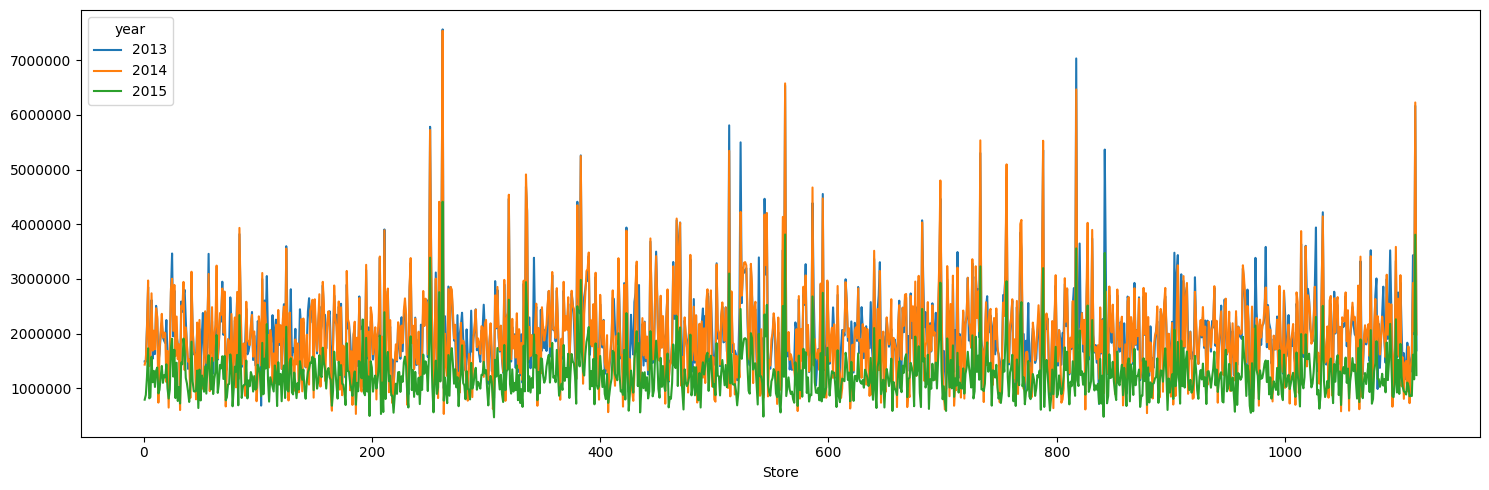

In [69]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.autolayout']=True
yearly_sales_of_store0.plot()
plt.ticklabel_format(scilimits=(-1,8))

##### 1. Why did you pick the specific chart?

I choose the line plot as it is a type of chart which can show us up and down value of wide range of store id's without being too much messy.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that rise or fall of sales is not constant for wide range of rossmann stores which says it is not the question of brand which comes but individual stores having parameters affecting individually like locality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the stores might be affected by locality and brand might not be the reason affecting the stores sale individually. Locality means how popular the store are in the region comparatively to there nearest competition brand, rumour about the store and discounts offered by the competition brand store.

#### Chart - 2

<Axes: xlabel='Sales', ylabel='Density'>

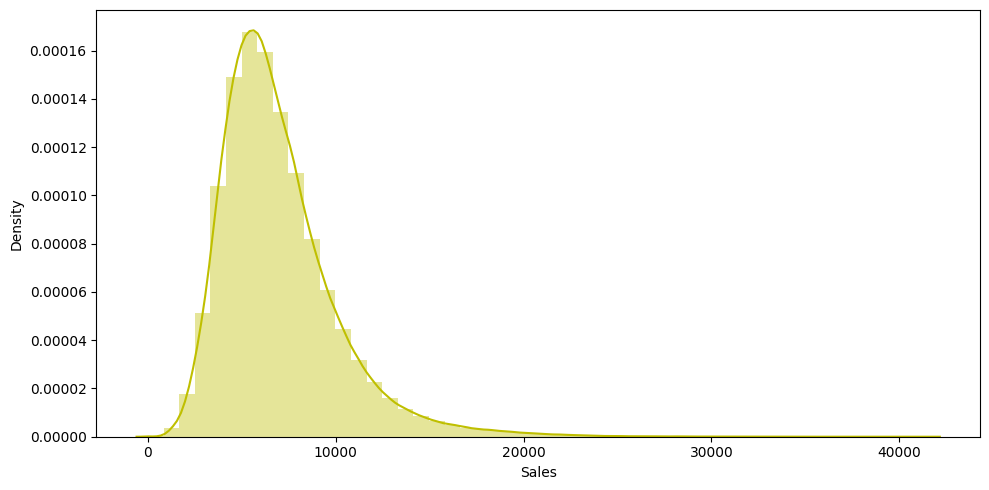

In [70]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.distplot(rossman_df1['Sales'],color="y")

##### 1. Why did you pick the specific chart?

We have used distribution plot so as to understand how skewed our sales data is.

##### 2. What is/are the insight(s) found from the chart?

The insight found is around 8000 sales for the day have the max number of counts among the wide range of stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is good to have 8000 sales but we should be prepared to have stock for higher sales than it and also manage to be able to retain the stock if the sales fall down.

#### Chart - 3

<Axes: >

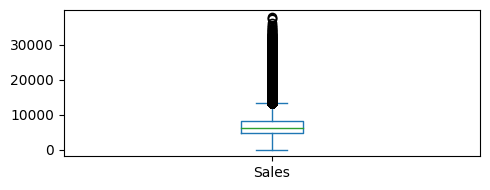

In [71]:
# Chart - 3 visualization code
plt.rcParams['figure.figsize'] = (5,2)
plt.rcParams['figure.autolayout']=True
sales_2013.plot(kind='box')

##### 1. Why did you pick the specific chart?

To show whether there are outliers or not in year 2013 Sales, this chart is good to use.

##### 2. What is/are the insight(s) found from the chart?

Around 15000 is the max whisker. And sales above it are outlier for year 2013.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Fitting our model to these outlier will move our R^2 score down to 0 and will give errors. This will negatively impact our business as the output is unpredictable.

#### Chart - 4

<Axes: >

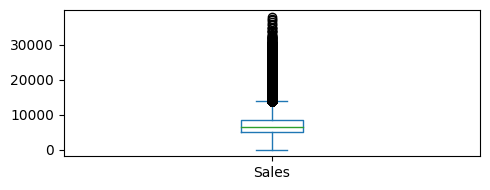

In [72]:
# Chart - 4 visualization code
plt.rcParams['figure.figsize'] = (5,2)
plt.rcParams['figure.autolayout']=True
sales_2014.plot(kind='box')

##### 1. Why did you pick the specific chart?

To show whether there are outliers or not in year 2014 Sales, this chart is good to use.



##### 2. What is/are the insight(s) found from the chart?

Around 15000 is the max whisker. And sales above it are outlier for year 2014.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Fitting our model to these outlier will move our R^2 score down to 0 and will give errors. This will negatively impact our business as the output is unpredictable.

#### Chart - 5

<Axes: >

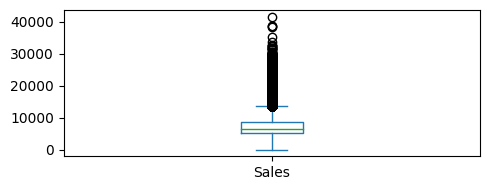

In [73]:
# Chart - 5 visualization code
plt.rcParams['figure.figsize'] = (5,2)
plt.rcParams['figure.autolayout']=True
sales_2015.plot(kind='box')

##### 1. Why did you pick the specific chart?

To show whether there are outliers or not in year 2015 Sales, this chart is good to use.

##### 2. What is/are the insight(s) found from the chart?

Around 15000 is the max whisker. And sales above it are outlier for year 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Fitting our model to these outlier will move our R^2 score down to 0 and will give errors. This will negatively impact our business as the output is unpredictable.

#### Chart - 6

<Axes: ylabel='Density'>

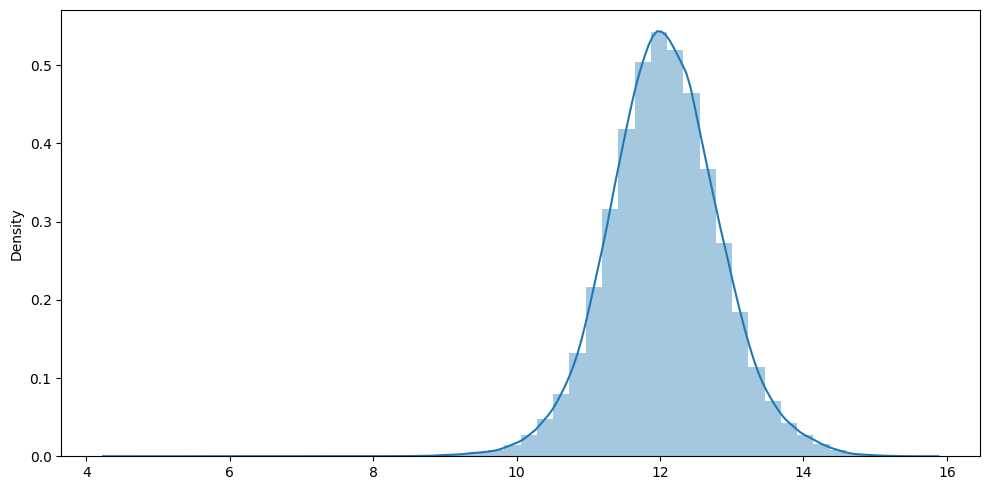

In [74]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
d=rossman_df1[rossman_df1['Sales']>0]
fitted_data, filled_lambda=stats.boxcox(d['Sales'])
sns.distplot(fitted_data)

##### 1. Why did you pick the specific chart?

We applied the Boxcox transformation to remove the skewness so that our data distribution is normal and to visualize this distribution plot is good to use.

##### 2. What is/are the insight(s) found from the chart?

Now the distribution is normally distributed which will help us to perform hypothesis test.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The normal nature of the distplot will help us to perform hypothesis test.

#### Chart - 7

<Axes: xlabel='Sales', ylabel='Density'>

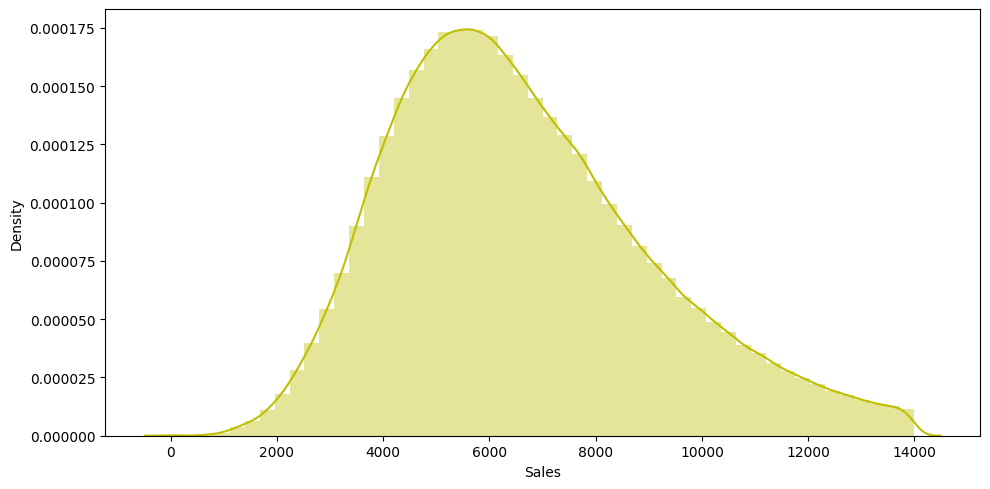

In [75]:
# Chart - 7 visualization code
plt.figure(figsize=(10,5))
sns.distplot(rossman_df2['Sales'],color="y")

##### 1. Why did you pick the specific chart?

We removed the outliers by limiting our sales upto 14000. so for visualizing the distribution we are using distplot.

##### 2. What is/are the insight(s) found from the chart?

Now we have around 6000 max count of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is good to be prepared for having sales around 6000 that is even if sales goes down or up the store should be able handle customers.

#### Chart - 8

<Axes: ylabel='Density'>

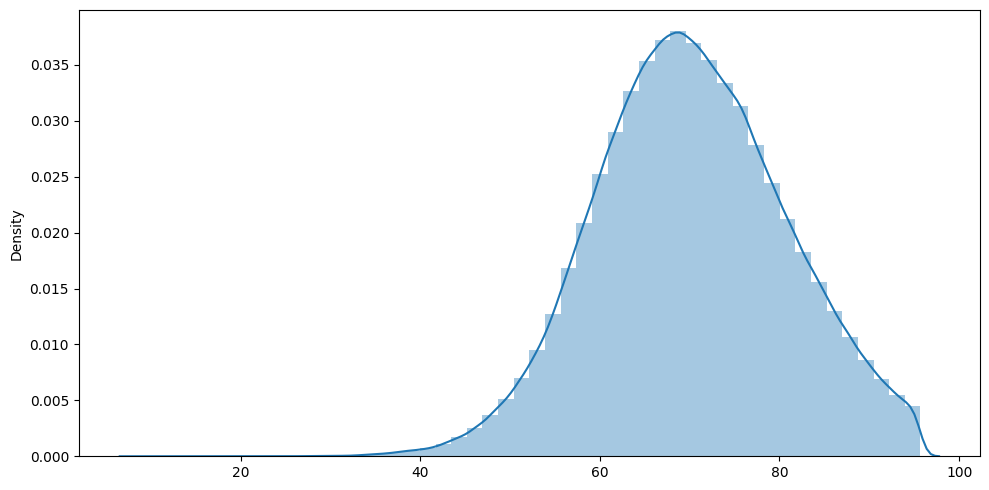

In [76]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
d=rossman_df2[rossman_df2['Sales']>0]
fitted_data, filled_lambda=stats.boxcox(d['Sales'])
sns.distplot(fitted_data)

##### 1. Why did you pick the specific chart?

We applied the boxcox transformation to remove the skewness of the distribution plot and to visualize it we used distribution plot.

##### 2. What is/are the insight(s) found from the chart?

We have got  the normal distribution curve after applying transformation which will be helpful in performing hypothesis test.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This normal distribution curve will be helpful in performing hypothesis test which will be useful in determining the whether our null hypothesis is true or false

#### Chart - 9

Text(0.5, 1.0, 'Sum of sales according to store number on yearly basis')

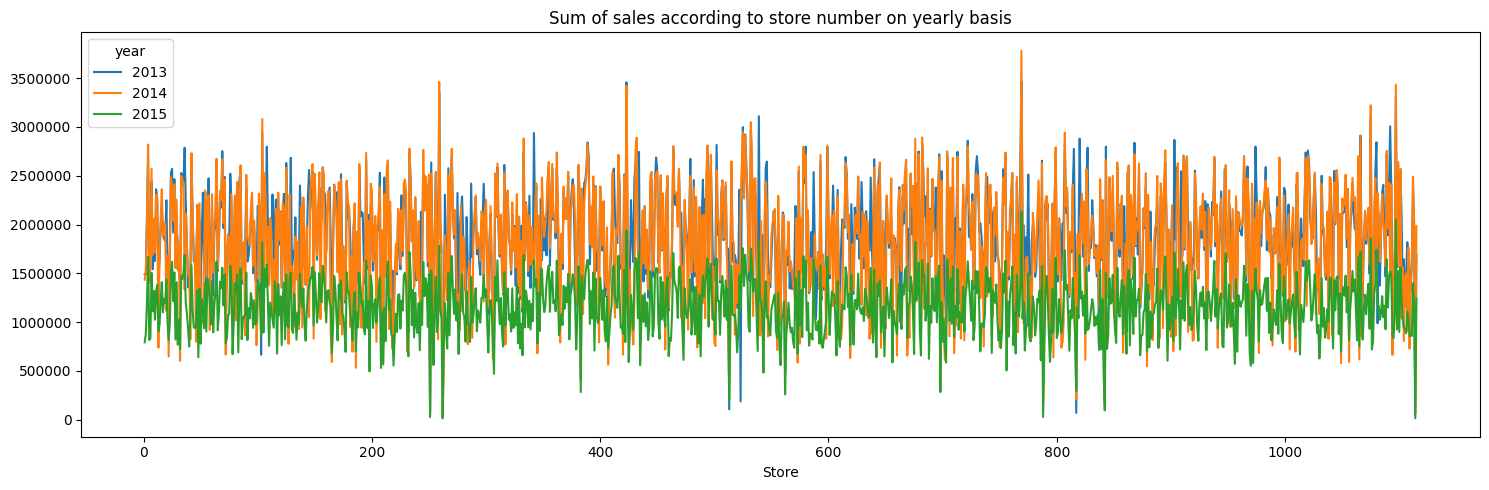

In [77]:
# Chart - 9 visualization code
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.autolayout']=True
yearly_sales_of_store.plot()
plt.ticklabel_format(scilimits=(-1,8))
plt.title('Sum of sales according to store number on yearly basis')

##### 1. Why did you pick the specific chart?

I choose the line plot as it is a type of chart which can show us up and down value of wide range of store id's without being too much messy.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that rise or fall of sales is not constant for wide range of rossmann stores which says it is not the question of brand which comes but individual stores having parameters affecting individually like locality. But we have have removed the outliers which are above 14000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the stores might be affected by locality and brand might not be the reason affecting the stores sale individually. Locality means how popular the store are in the region comparatively to there nearest competition brand, rumour about the store and discounts offered by the competition brand store.

#### Chart - 10

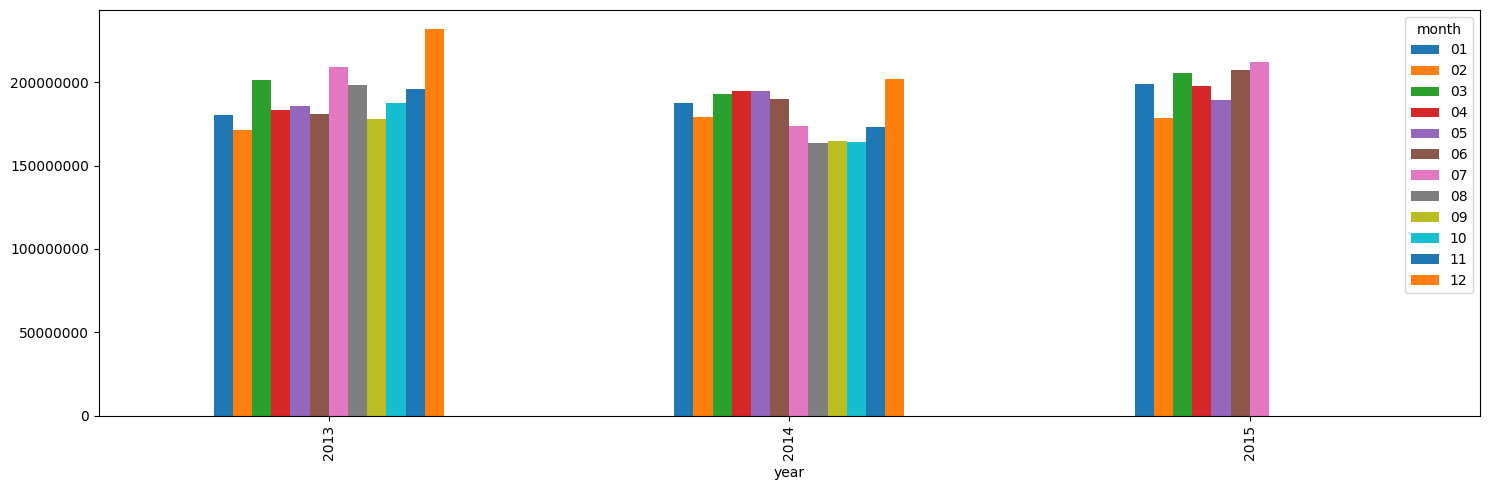

In [78]:
# Chart - 10 visualization code
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.autolayout']=True
monthly_sales.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

We have used the bar chart to capture the seasonality during months of year as with different colour the chart will be more readable.

##### 2. What is/are the insight(s) found from the chart?

The ending month that is December of year 2013 and 2014 was having maximum sales. Rest of the months are not showing any significant pattern which can tell us about seasonality but december as it is a start of winter in Europe may be the cause of cold because of which customers are visiting the stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will have a positive impact on the business in the month of December as people in europe may be stocking up the drugs required in rest of the season of winter.

#### Chart - 11

Text(0, 0.5, 'Sales sum')

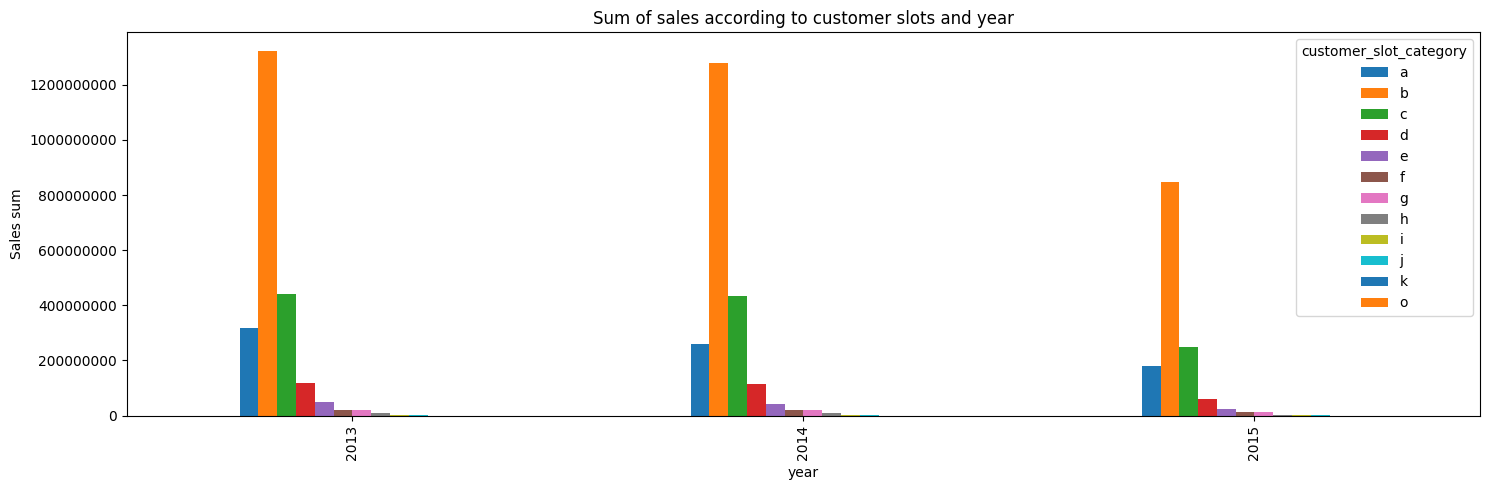

In [79]:
# Chart - 11 visualization code
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.autolayout']=True
customer_slot_category_sales.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sum of sales according to customer slots and year')
plt.ylabel('Sales sum')

##### 1. Why did you pick the specific chart?

To know exactly what number of customer's visit the stores daily and on yearly basis sum of there sales. We used bar chart to show this data as it will be good in reprentation.

##### 2. What is/are the insight(s) found from the chart?

We are able to get the insight from the graph that B customer slot category that is 500 to 1000 customers has the max number of Sales daily and on yearly basis

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes gained insight will have a positive impact on the business as we will be able to be prepared for handling 500 to 1000 customers on daily basis but the brand should work on gaining more customers.

#### Chart - 12

Text(0, 0.5, 'Sum of sales')

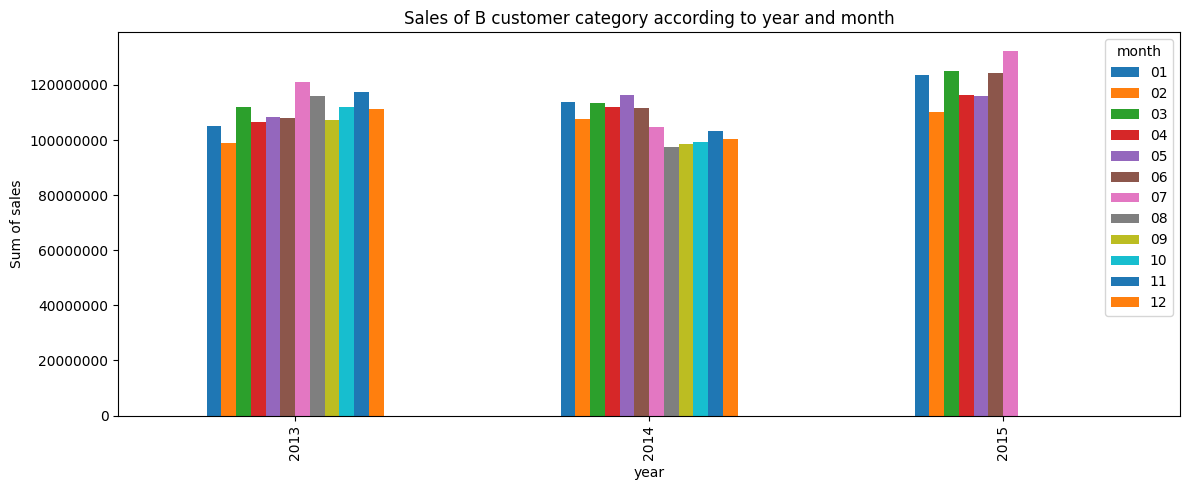

In [80]:
# Chart - 12 visualization code
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
customer_slot_category_sales_b_graph.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales of B customer category according to year and month')
plt.ylabel('Sum of sales')

##### 1. Why did you pick the specific chart?

Sales of B customer category on monthly basis of each year is shown in the bar chart as the colours in bar form make it easy to interpret the data.

##### 2. What is/are the insight(s) found from the chart?

There is no perfect pattern which will help us to understand the monthly data has seasonality and as the December month was showing the max sum of sales is not the case in B customer category which means the number of customers are distributed on daily basis in wide range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight which is going to have a positive or negative impact.

#### Chart - 13

Text(0, 0.5, 'Sum of sales')

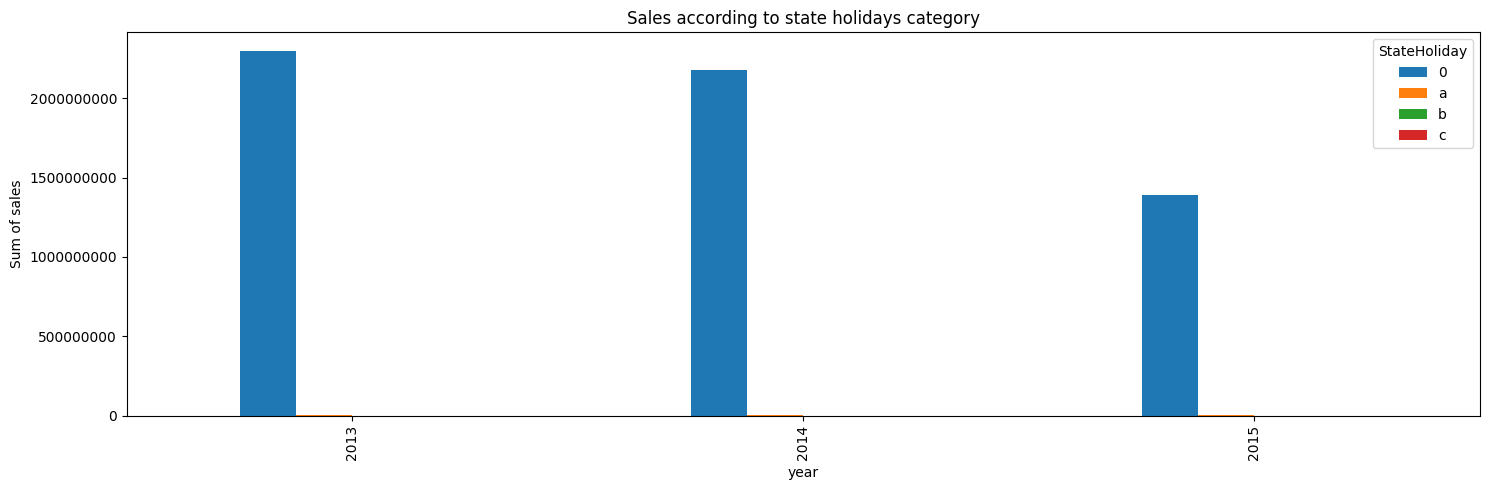

In [81]:
# Chart - 13 visualization code
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.autolayout']=True
state_holiday_related_sales.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales according to state holidays category')
plt.ylabel('Sum of sales')

##### 1. Why did you pick the specific chart?

The bar charts are good at representing categorical data. So we have used it to represent whether we have state holiday or not and the sales corresponding to it.

##### 2. What is/are the insight(s) found from the chart?

We can see in each year when there is no state holiday, the sales sum is very high related to when there is a state holiday. And as we are reaching to year 2015 the sales are droping.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight is we are having negative impact on the sales whose reason might be the brand getting impacted by some external reasons.

#### Chart - 14

Text(0, 0.5, 'Sum of sales')

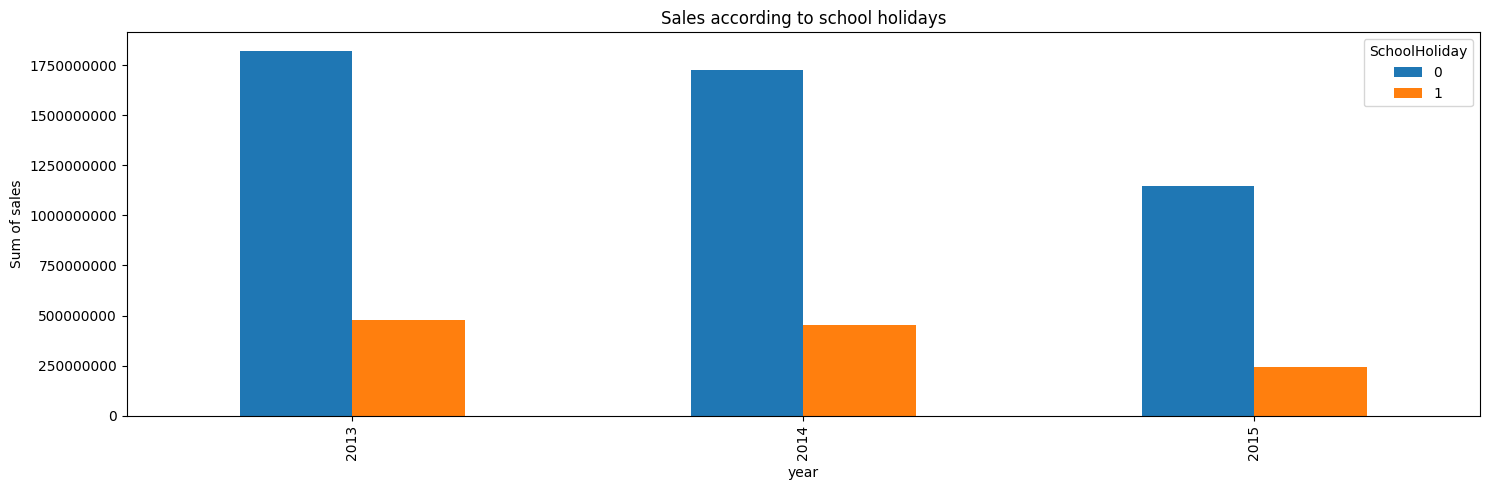

In [82]:
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.autolayout']=True
school_holiday_related_sales.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales according to school holidays')
plt.ylabel('Sum of sales')

##### 1. Why did you pick the specific chart?

The school holiday is a dichotomous parameter which can be represented in bar plot more clearly with sum of sales corresponding to school holiday or not a school holiday.

##### 2. What is/are the insight(s) found from the chart?

We are having a insight that when there are no school holiday we have more number of customers compared to when there are school holiday. And also in this case the sales are going down year by year upto year 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  We are having negative impact on the business as the  sales are going down year by year and the reason for it may be brand getting affected by some external reasons.

#### Chart - 15

Text(0, 0.5, 'Sum of sales')

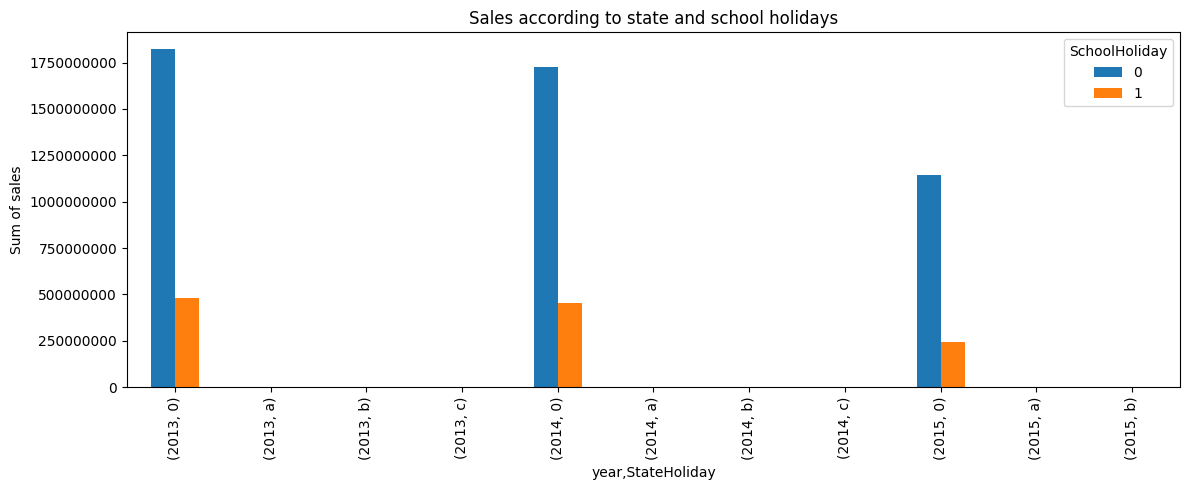

In [83]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
state_school_holiday_related_sales.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales according to state and school holidays')
plt.ylabel('Sum of sales')

##### 1. Why did you pick the specific chart?

We have used bar plot as it is more suitable for representation when there are categorical variable.

##### 2. What is/are the insight(s) found from the chart?

We have gained insight by comparing the school holiday and state holiday to sales that on days of no state holiday and having school holiday there might be sales but during state holiday's the sales are close to no sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight are having negative impact as it shows during holidays business is badly affected whether it might be school or state holiday.

#### Chart - 16

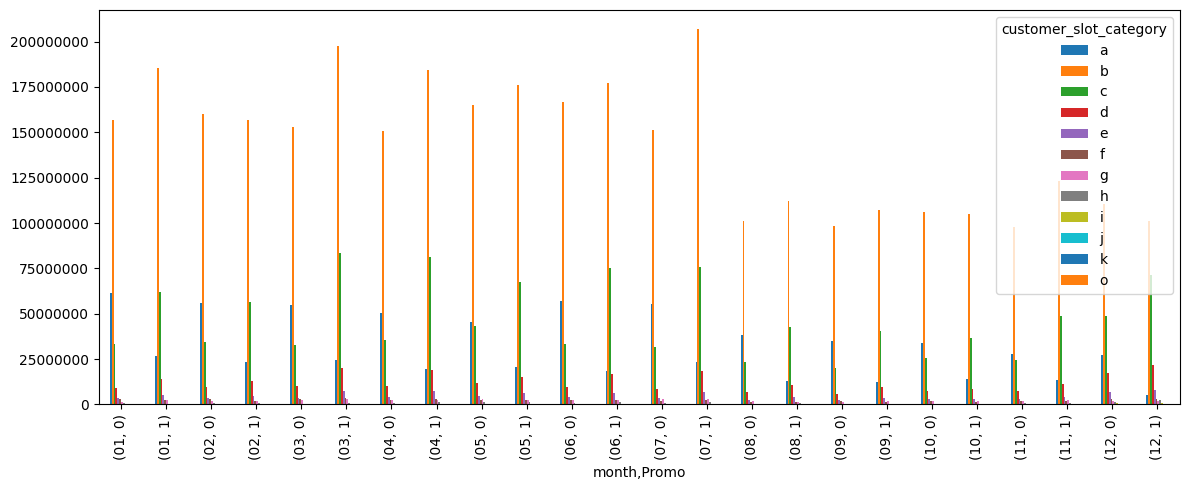

In [84]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
promo0_related_sales_monthly.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

We have used bar chart as we are representing categorical data.

##### 2. What is/are the insight(s) found from the chart?

We have found insight that the sales are increasing when we are having promotion comparatively to no promotion. And from August till december monthly sum of sales have fallen down.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight shows the promotion have positive impact in increasing sales but sales are falling from the month of August.

#### Chart - 17

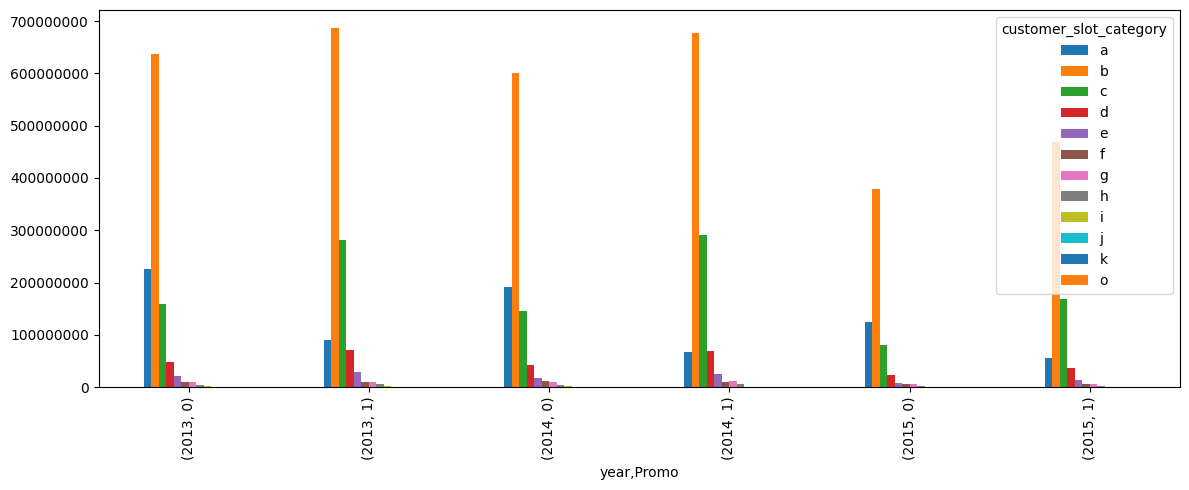

In [85]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
promo0_related_sales_yearly.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

We are representing promo related sales yearly and the number of customers contributing to sales in majority.

##### 2. What is/are the insight(s) found from the chart?

We have found insight that B customer category has contributed to maximum sales and the promotion has also contributed to increase of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The number of customers contributing to sales on daily basis is 500 to 1000 which is good to have positive impact on business and promotion are also having good impact on business.

#### Chart - 18

Text(0, 0.5, 'Sum of sales')

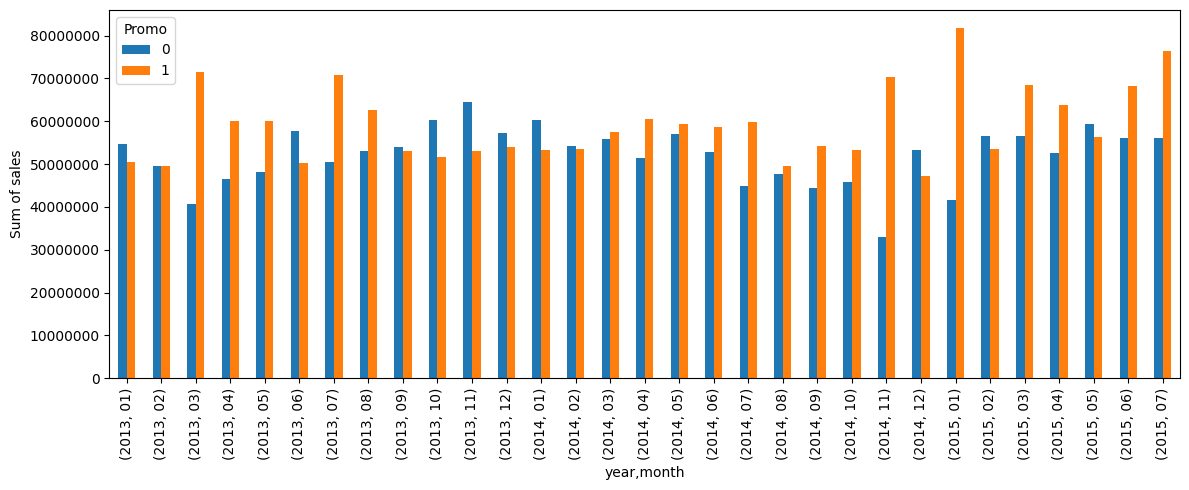

In [86]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
year_month_promo_sales.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Sum of sales')

##### 1. Why did you pick the specific chart?

To represent categorical data like promotion and year and month of sales it is good to use bar chart as it gives clear representation.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that during few months the promotions are working well but also during rest of the months there is no significant sales compared to days when there are no promotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the promotions are having good impact on business during few months but there are also days when promotions are not working well.

#### Chart - 19

Text(0, 0.5, 'Sum of sales')

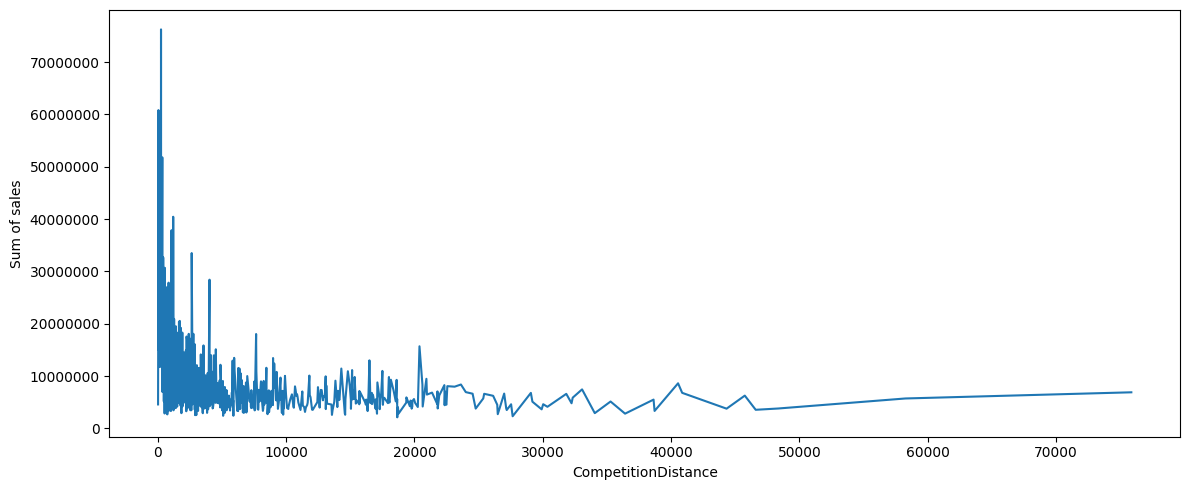

In [87]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
Sales_competion_distance.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Sum of sales')

##### 1. Why did you pick the specific chart?

We have used line chart as it is good at representing wide range of competitiondistance corresponding to sum of sales.

##### 2. What is/are the insight(s) found from the chart?

We have got the insight that as the competition distance is increasing the sales is continue to decrease which shows that when the nearest competition is not much distance away the sales are maximimum which also says the locality is crowded of such stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We gained the insight that competition distance is having positive impact on business as the locality might be crowded in such places.

#### Chart - 20

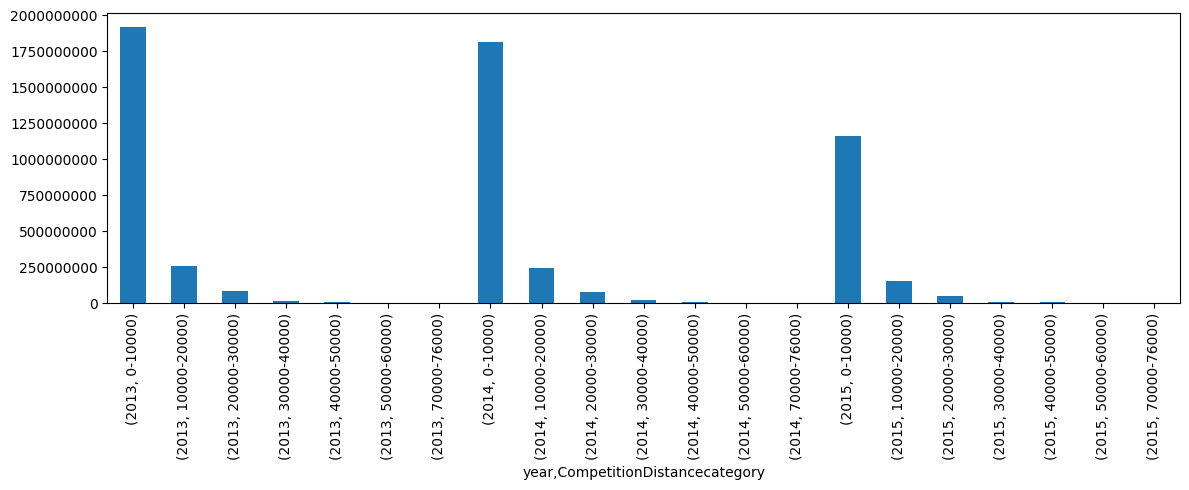

In [88]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
Sales_competion_distance_category.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

In every year, the lesser the competition distance then the sales will be more. To represent each years sales of competition distance category bar chart is good.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that as distance from nearest competition is becoming smaller the sales are increasing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight is having positive impact on business as the sales is increasing as the distance is decreasing from the nearest competition.

#### Chart - 21

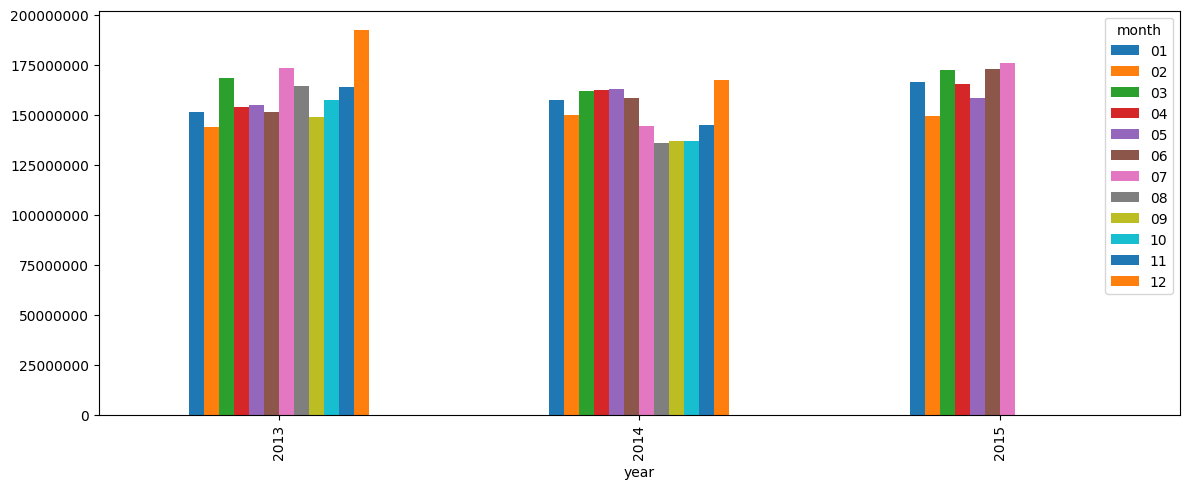

In [89]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
competitiondist_category_10000_monthly.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

The bar plot is good at representing the categorical data which in our case is months of the year which is 0-10000 competition distance category sales.

##### 2. What is/are the insight(s) found from the chart?

We have not found any particular pattern in the sales of the months which is repetitive but the december month is having max sales compared to rest of the months of respective year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to the chart the december month is having high sales of each year which has positive impact on the business.

#### Chart - 22

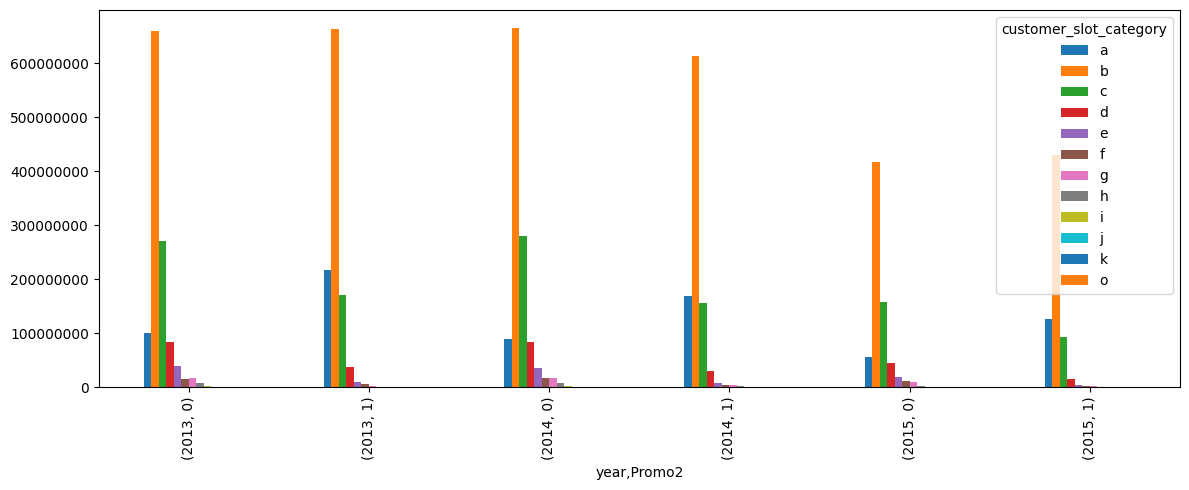

In [90]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
promo2_related_sales_yearly.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

Bar charts are good at representing categorical data so we used it to represnt sum of sales of promo and year of sales together.

##### 2. What is/are the insight(s) found from the chart?

We have found the insight that B customer slot category that is 500 to 1000 customers has the max sales in each year and consecutive promotion are not playing important role in the sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have gained insight that consecutive promotion are not playing impotant role in the sales of the year as the sales are either constant or dropping year by year.

#### Chart - 23

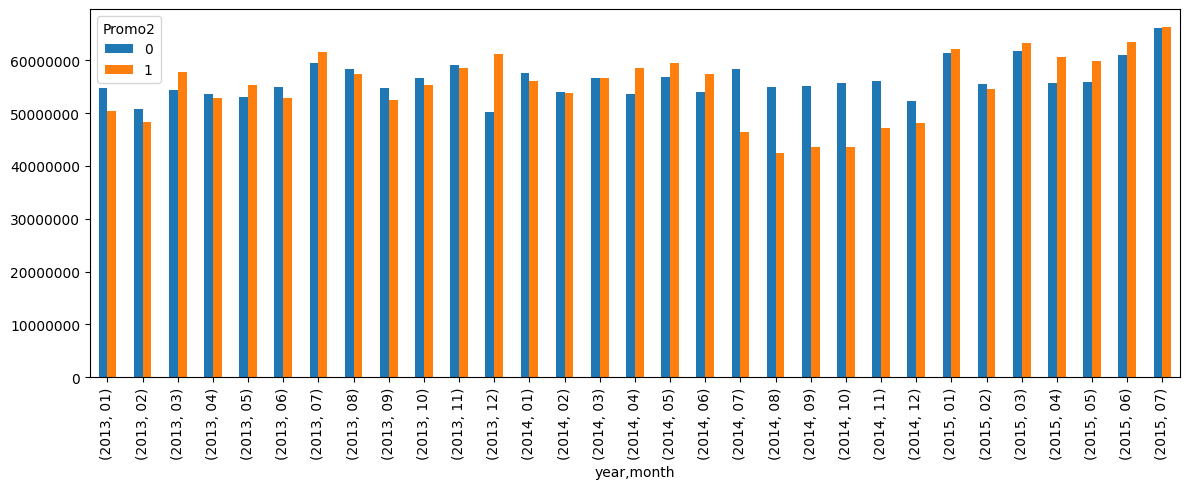

In [91]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.autolayout']=True
year_month_promo2_sales.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

We used bar chart as it is good at representing categorical data.

##### 2. What is/are the insight(s) found from the chart?

We found that the consecutive promotion are not having any significant role to play in sales of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are no particular pattern from which we can say there is seasonality or effect  of locality.

#### Chart - 24 - Correlation Heatmap

<Axes: >

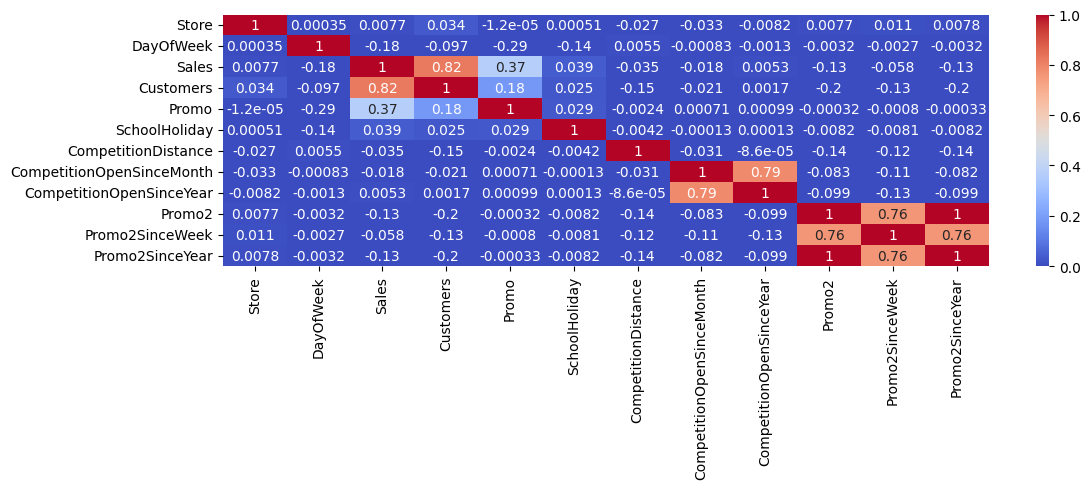

In [92]:
correlation=join_copy.corr()
sns.heatmap(correlation, vmin=0,cmap='coolwarm',annot=True)

##### 1. Why did you pick the specific chart?

This correlation plot tells us the relation between each column's which will help us in removing columns which are less correlated with sales column.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is customers column is more correlated with sales column.

#### Chart - 15 - Pair Plot

In [93]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1) Mean of competition distance is atleast 5000 for max number of customer category B which has maximum sales.

2)Store type C has average sales of atleast 6000.

3)Assortment type C have avg of atleast 2000 customers

In [94]:
#Making the functions like formula of proportion, mean and variance named as varience in class
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

#Making the variance and z test function
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x:norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value

# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

 Mean of competition distance is atleast 5000 for max number of customer category B which has maximum sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 5000

Alternate Hypothesis : N < 5000

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [95]:
#we create a variable having data of b customer slot category
hypo_var1=store_join1[store_join1['customer_slot_category']=='b']
hypo_var1

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,customer_slot_category,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistancecategory
0,1,5,2015-07-31,5263,555,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
1,1,4,2015-07-30,5020,546,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
2,1,3,2015-07-29,4782,523,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
3,1,2,2015-07-28,5011,560,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
4,1,1,2015-07-27,6102,612,1,0,1,30,2015,07,b,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844385,292,3,2013-01-09,6436,765,1,0,0,01,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844386,292,2,2013-01-08,6859,792,1,0,0,01,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844389,292,5,2013-01-04,4202,560,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000
844390,292,4,2013-01-03,4580,662,0,0,1,00,2013,01,b,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,0-10000


In [96]:
# Perform Statistical Test to obtain P-Value
hypothesis_number = 5000
sample_mean = hypo_var1['CompetitionDistance'].mean()
size = len(hypo_var1['CompetitionDistance'])
std=(variance(hypo_var1['CompetitionDistance']))**0.5
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

In [97]:
sample_mean

5745.973146352963

In [98]:
# Getting P - Value
p = p_value(z=z,tailed='l',t="true",hypothesis_number=hypothesis_number,df=hypo_var1,col="CompetitionDistance")
print(p)
# Getting Conclusion
print(conclusion(p))

0.0
Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected that means Mean of competition distance is not atleast 5000 for max number of customer category B which has maximum sales and greater than 5000.

##### Why did you choose the specific statistical test?

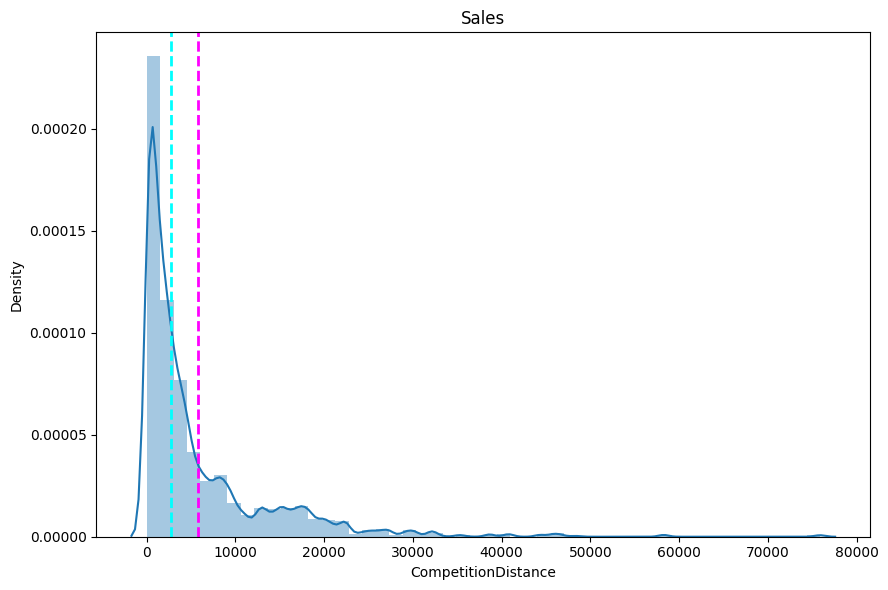

In [99]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_var1['CompetitionDistance'])
sns.distplot(hypo_var1['CompetitionDistance'])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Sales')
plt.show()

As the graph is slightly skewed we have used t-test.

### Hypothetical Statement - 2

Store type C has average sales of atleast 6000

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 6000

Alternate Hypothesis : N < 6000

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [100]:
# Perform Statistical Test to obtain P-Value
hypo_var2=store_join1[store_join1['StoreType']=='c']
# Getting the required parameter values for hypothesis testing
hypothesis_number = 6000
sample_mean = hypo_var2["Sales"].mean()
size = len(hypo_var2)
std=(variance(hypo_var2["Sales"]))**0.5

In [101]:
z = findz.mean(hypothesis_number,sample_mean,size,std)

In [102]:
print(sample_mean,std)

6932.512754695605 2897.5645782494976


In [103]:
# Getting P - Value
p = p_value(z=z,tailed='l',t="true",hypothesis_number=hypothesis_number,df=hypo_var2,col="Sales")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected successfully that means Store type C has no average sales of atleast 6000 but more than 6000.

##### Why did you choose the specific statistical test?

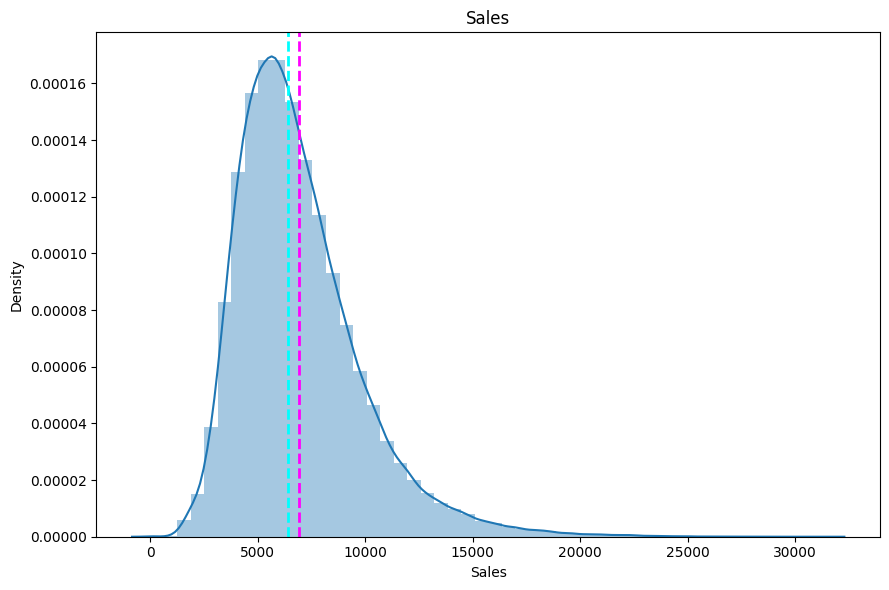

In [104]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_var2["Sales"])
sns.distplot(hypo_var2["Sales"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Sales')
plt.show()

As the graph is slightly skewed we have used t test.

### Hypothetical Statement - 3

Assortment type C have avg of atleast 2000 customers

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 2000

Alternate Hypothesis : N < 2000

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [105]:
# Perform Statistical Test to obtain P-Value
hypo_var3=store_join1[(store_join1["Assortment"]=='c')]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2000
sample_mean = hypo_var3["Customers"].mean()
size = len(hypo_var3)
std=(variance(hypo_var3["Customers"]))**0.5

In [106]:
sample_mean

752.169958928722

In [107]:
z = findz.mean(hypothesis_number,sample_mean,size,std)

In [108]:
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_var3,col="Customers")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

I have used z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected successfully that means Assortment type C dont have avg of atleast 2000 customers but smaller than 2000 that is around 750.

##### Why did you choose the specific statistical test?

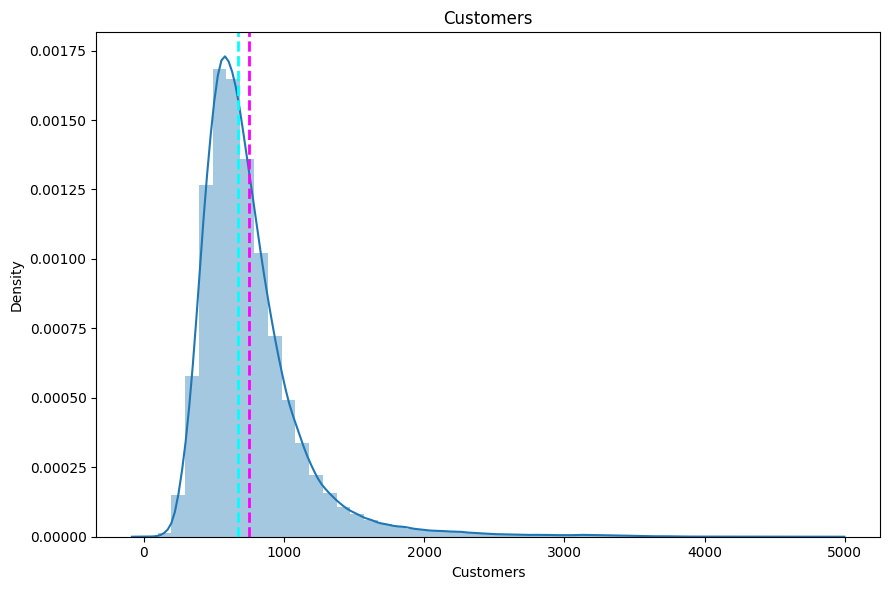

In [109]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_var3["Customers"])
sns.distplot(hypo_var3["Customers"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Customers')
plt.show()

As the graph is not skewed much so we have used z-test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
week_numbers                 0
year                         0
month                        0
customer_slot_category       0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


<Axes: >

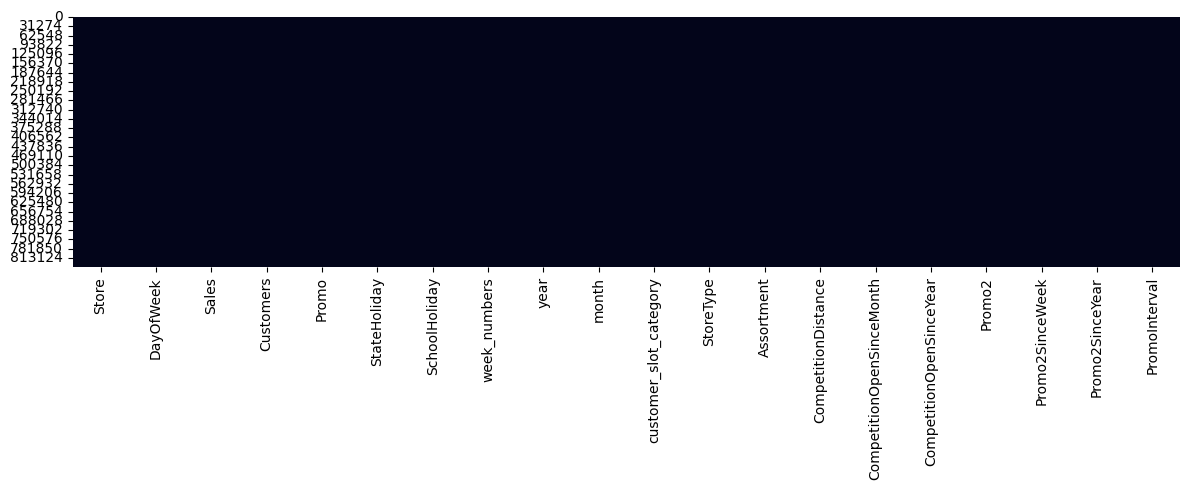

In [110]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(join_copy.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(join_copy.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [111]:
# Handling Outliers & Outlier treatments
#rossman_df2=rossman_df1.drop(rossman_df1[rossman_df1['Sales']>14000].index)
#-> we have removed the outlier before in data wrangling part so commenting the code.
symmetric_feature=[]
non_symmetric_feature=[]
for i in join_copy.describe().columns:
  if abs(join_copy[i].mean()-join_copy[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['SchoolHoliday']
Skew Symmetric Distributed Features : - ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [112]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [113]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
  join_copy.loc[join_copy[feature]<= outlier_treatment(df=join_copy,feature=feature)[1], feature]=outlier_treatment(df=join_copy,feature=feature)[1]
  join_copy.loc[join_copy[feature]>= outlier_treatment(df=join_copy,feature=feature)[0], feature]=outlier_treatment(df=join_copy,feature=feature)[0]

In [114]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [115]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  join_copy.loc[join_copy[feature]<= outlier_treatment_skew(df=join_copy,feature=feature)[1], feature]=outlier_treatment_skew(df=join_copy,feature=feature)[1]
  join_copy.loc[join_copy[feature]>= outlier_treatment_skew(df=join_copy,feature=feature)[0], feature]=outlier_treatment_skew(df=join_copy,feature=feature)[0]

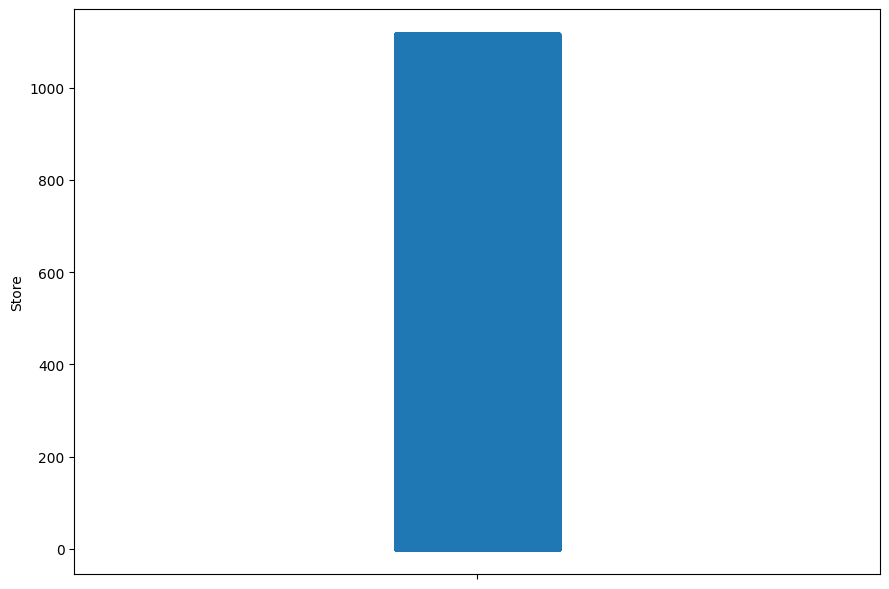

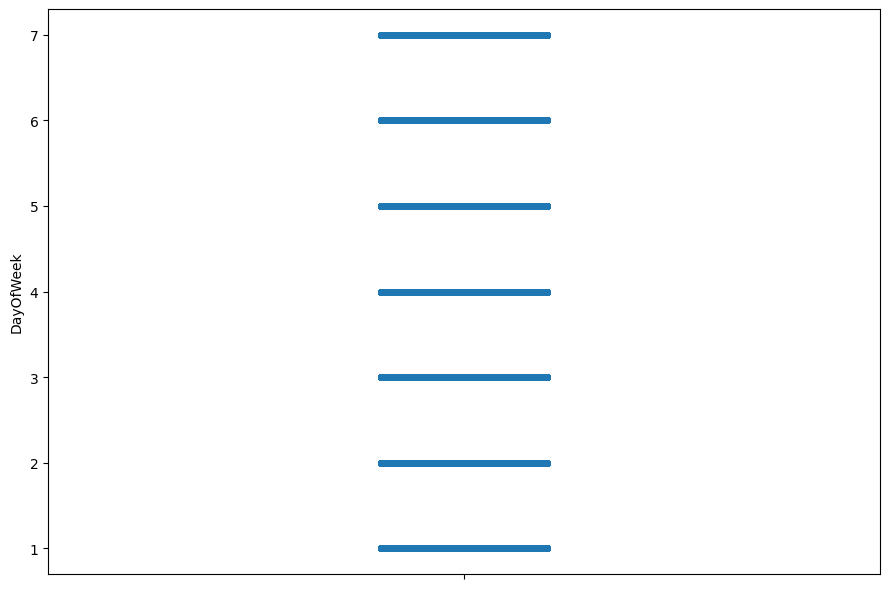

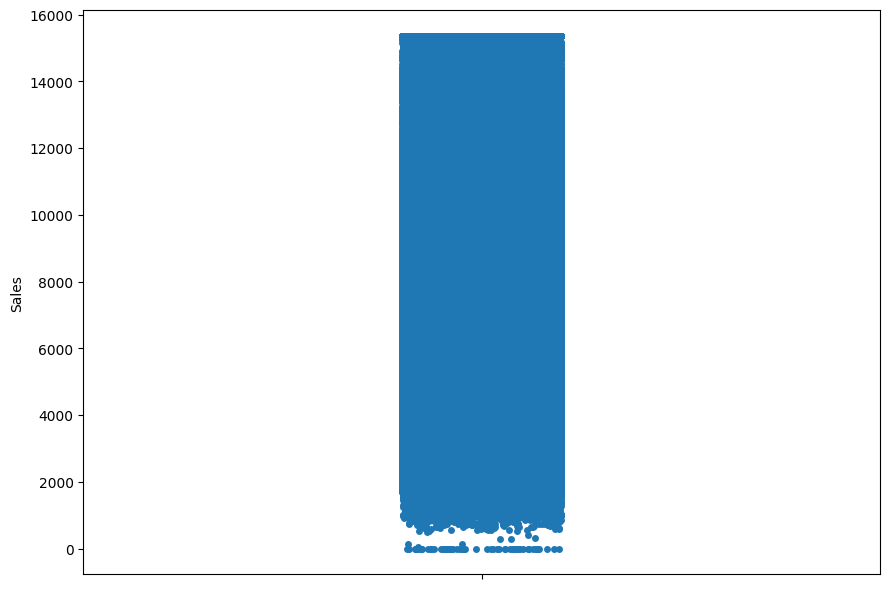

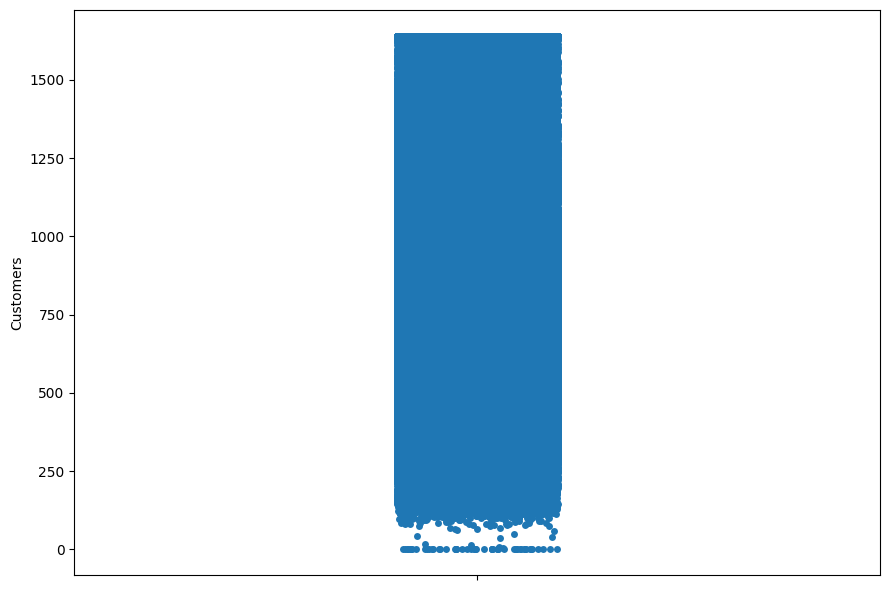

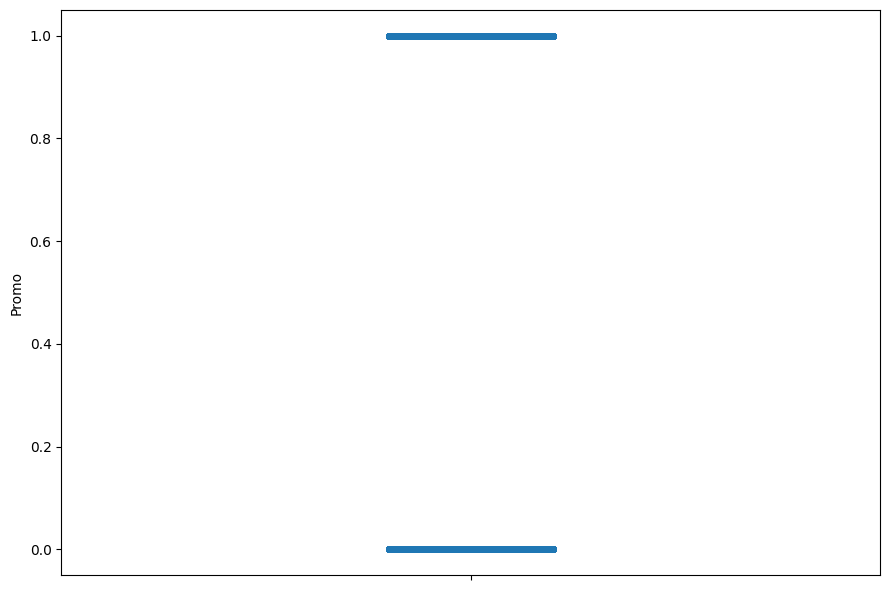

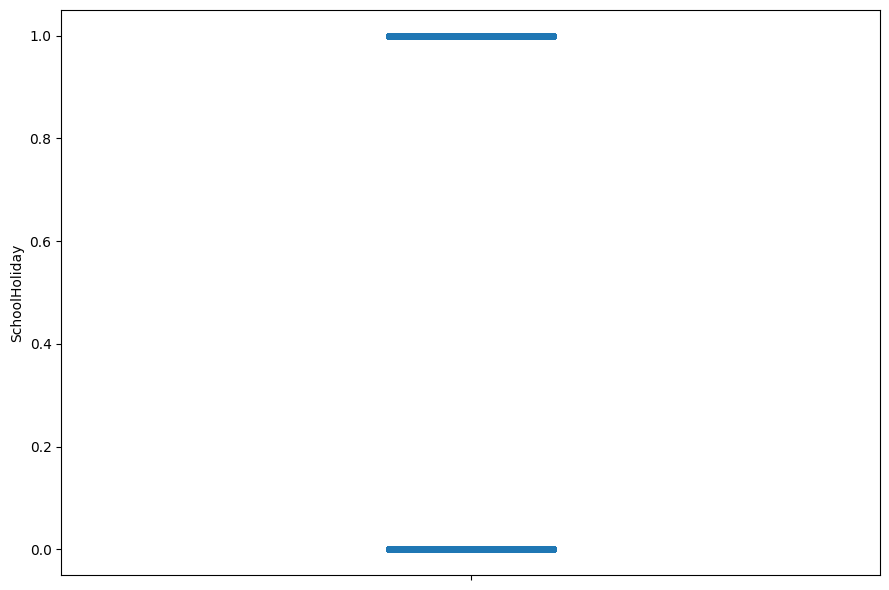

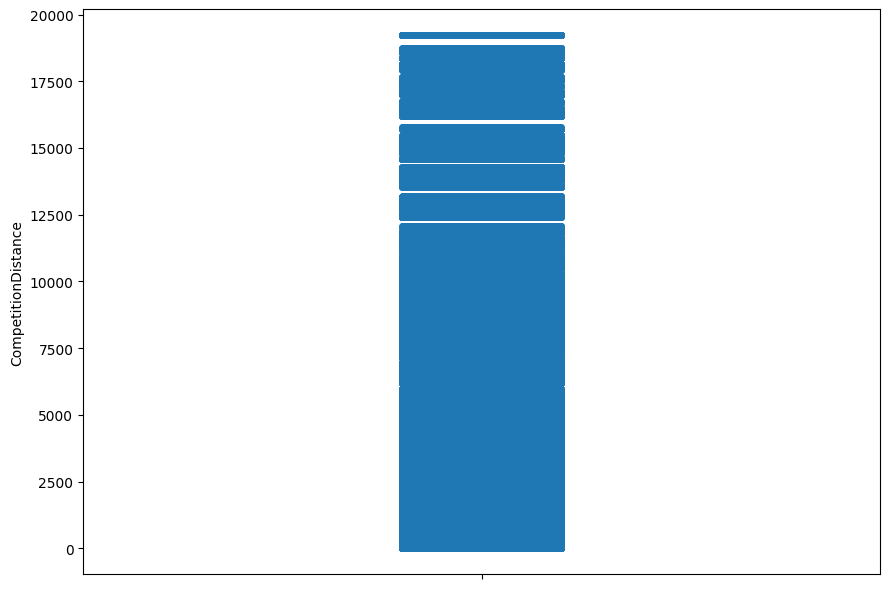

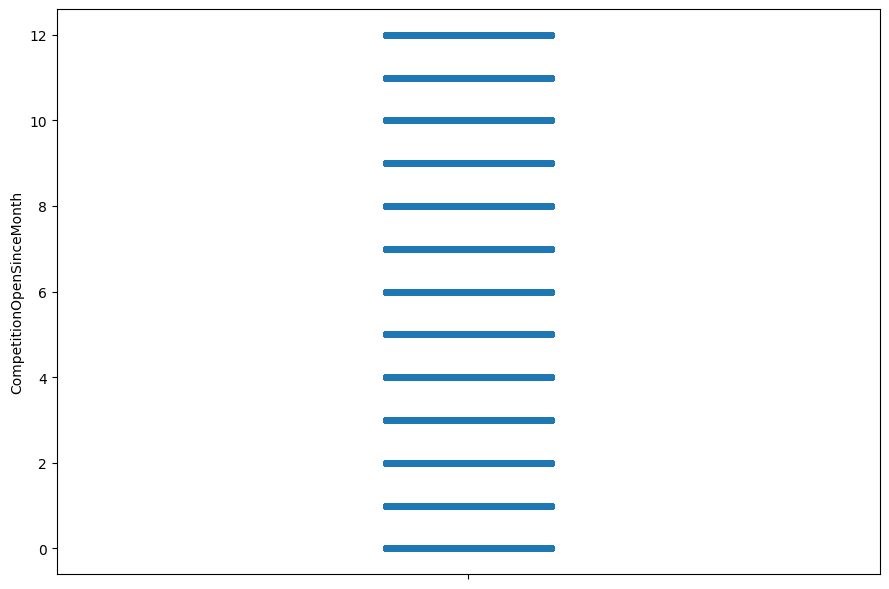

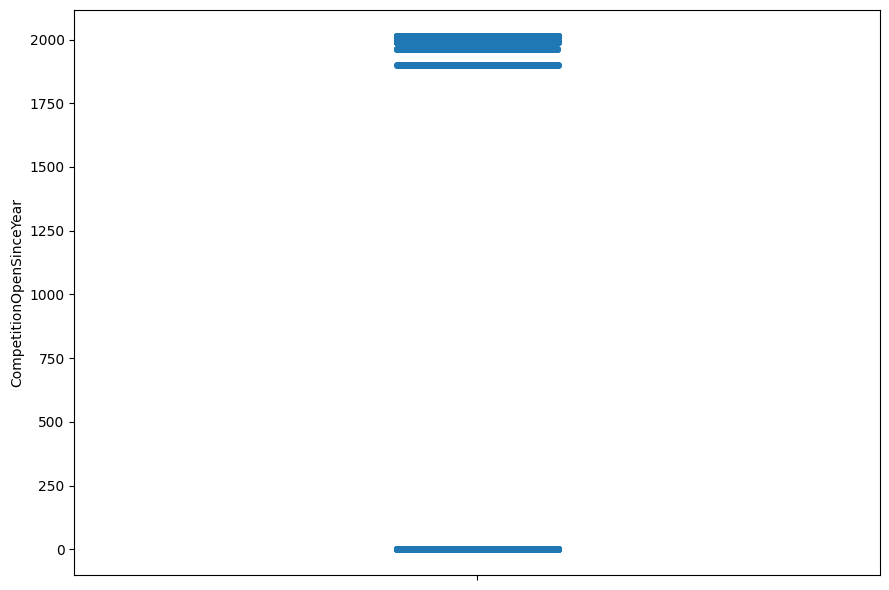

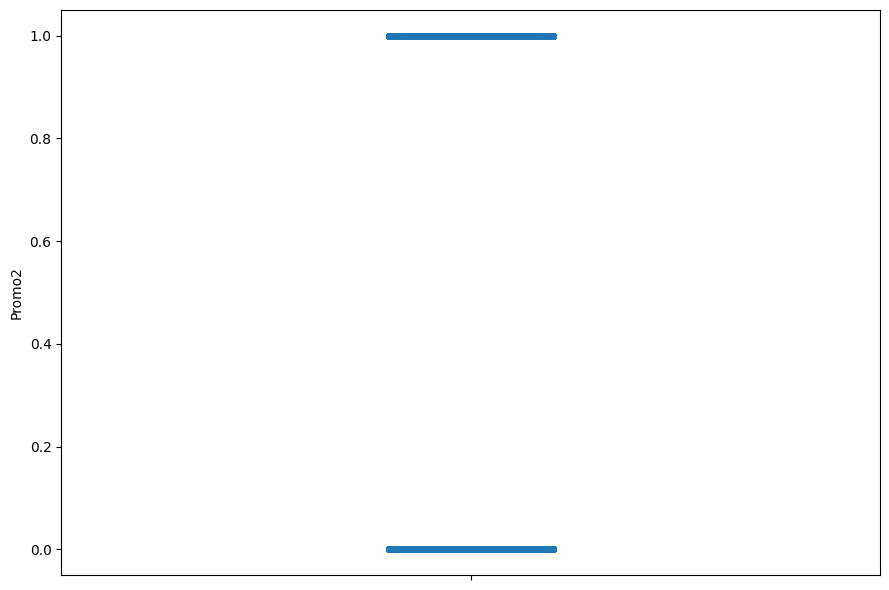

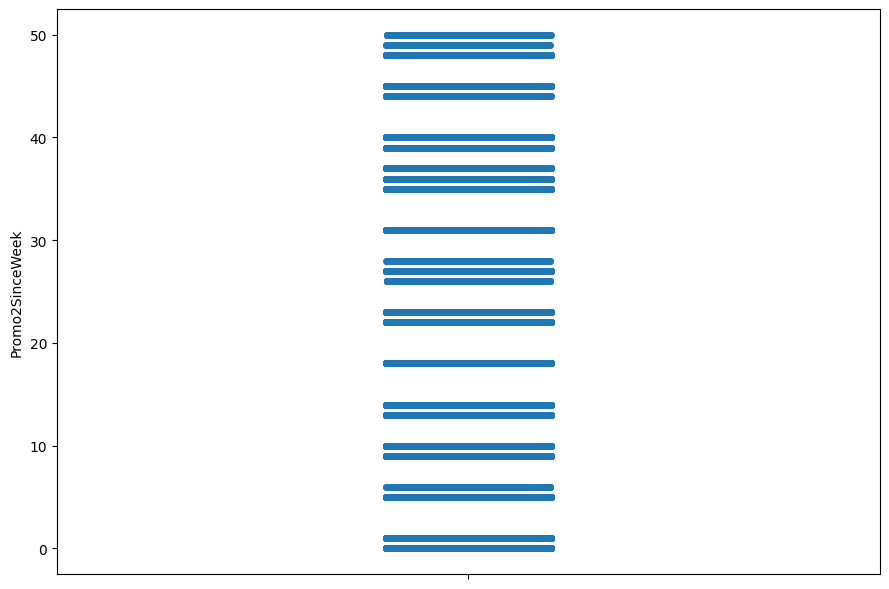

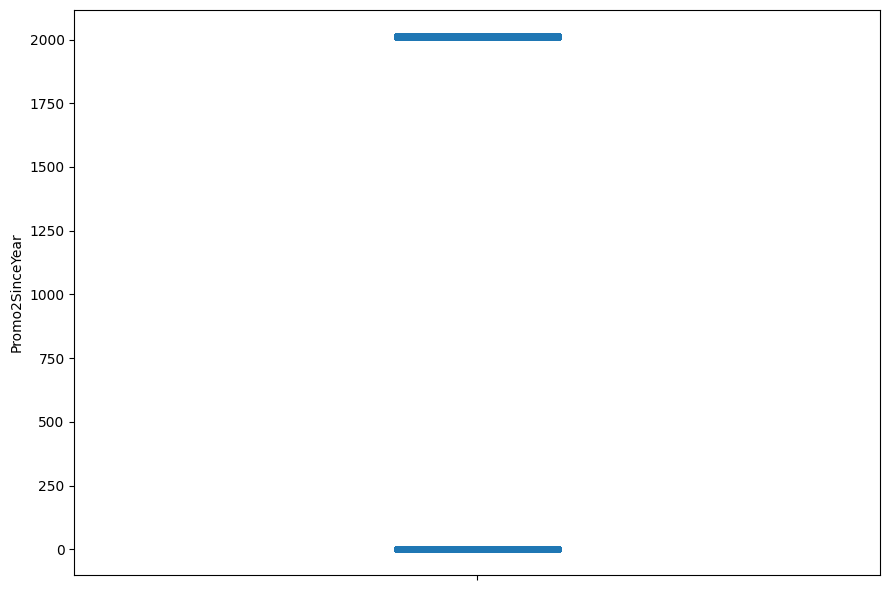

In [116]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in join_copy.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(join_copy[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

1) First we used the boxplot on each years sale to show us outliers are present or not.

2) Then we calculated the maximum whisker value as in boxplot it was showing outliers only in the above part.

3) We removed the outliers by dropping all the values above 14000.

4) We put the symmetric and skew-symmetric columns name in separate variable and did outlier treatment of these separated columns separately.



### 3. Categorical Encoding

In [117]:
join_copy.describe().columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [118]:
# Encode your categorical columns
categorical_features=['week_numbers','year','month','StateHoliday','StoreType','Assortment','PromoInterval']

In [119]:
#we are dropping the customer slot category column
join_copy=join_copy.drop('customer_slot_category',axis=1)

In [120]:
#We are copying the join copy table in join_copy1 variable
join_copy1=join_copy.copy()

In [121]:
#We are changing string type of categorical columns to int data type
join_copy1=join_copy1.astype({'week_numbers':'int','year':'int','month':'int'})

In [122]:
#We are changing the rest of the columns from string to number column by label encoding
encoders_nums = {'StateHoliday':{'0':0, 'a':1, 'b':2, 'c':3},
                 'StoreType':{'a':1,'b':2,'c':3,'d':4},
                 'Assortment':{'a':1,'b':2,'c':3},
                 'PromoInterval':{'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}}
#Replacing the string with numbers
join_copy1=join_copy1.replace(encoders_nums)
join_copy1

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,week_numbers,year,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1.0,30,2015,7,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,0,1.0,30,2015,7,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,0,1.0,30,2015,7,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,0,1.0,30,2015,7,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,0,1.0,30,2015,7,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,9291,1002,1,0,0.0,1,2013,1,1,1,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2748,340,0,0,0.0,0,2013,1,1,1,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,4202,560,0,0,1.0,0,2013,1,1,1,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,4580,662,0,0,1.0,0,2013,1,1,1,1100.0,6.0,2009.0,0,0.0,0.0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used label encoding for StateHoliday, StoreType, Assortment and PromoInterval because there are only 2-3 unique values in each column which needed to be encoded.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [123]:
# Expand Contraction

#### 2. Lower Casing

In [124]:
# Lower Casing

#### 3. Removing Punctuations

In [125]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [126]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [127]:
# Remove Stopwords

In [128]:
# Remove White spaces

#### 6. Rephrase Text

In [129]:
# Rephrase Text

#### 7. Tokenization

In [130]:
# Tokenization

#### 8. Text Normalization

In [131]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [132]:
# POS Taging

#### 10. Text Vectorization

In [133]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [134]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [135]:
# Select your features wisely to avoid overfitting

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(join_copy1[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear']])

,variables,VIF
0,Store,3.564168e+00
1,DayOfWeek,4.063457e+00
2,Sales,2.968804e+01
3,Customers,2.574329e+01
4,Promo,2.304442e+00
5,SchoolHoliday,1.234911e+00
6,CompetitionDistance,1.798049e+00
7,CompetitionOpenSinceMonth,6.080279e+00
8,CompetitionOpenSinceYear,8.023810e+00
9,Promo2,1.581301e+06


In [136]:
calc_vif(join_copy1[['Store', 'DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek',
       'Promo2SinceYear']])

,variables,VIF
0,Store,3.531917
1,DayOfWeek,4.012600
2,Customers,4.878598
3,Promo,1.987650
4,SchoolHoliday,1.233251
5,CompetitionDistance,1.614657
6,CompetitionOpenSinceMonth,2.151948
7,Promo2SinceWeek,3.742215
8,Promo2SinceYear,4.573021


In [137]:
numerical_features = ['Store', 'DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek',
       'Promo2SinceYear']

##### What all feature selection methods have you used  and why?

We have used Variance inflation factor in our feature selection. In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=1/{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1

And we are able to keep our VIF below 5 that is our variables are moderately correlated.

##### Which all features you found important and why?

Store, Customers and CompetitionDistance are the column which are of importance as it is not multicolinear as shown by VIF.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [138]:
# Transform Your data

### 6. Data Scaling

In [139]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [140]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [141]:
# Split your data to train and test. Choose Splitting ratio wisely.
#X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
#print(X_train.shape)
#print(X_test.shape)
#We have commented the code as we have done the split in sequence that is in ML model part.

##### What data splitting ratio have you used and why?

As the data is large so 20% test data is good for training purpose.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [142]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [143]:
#Copied the numerical features into features variable
features = numerical_features.copy()
#extending the features variable with categorical columns
features.extend(['week_numbers','year','month','StateHoliday','StoreType','Assortment','PromoInterval'])

In [144]:
features

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'week_numbers',
 'year',
 'month',
 'StateHoliday',
 'StoreType',
 'Assortment',
 'PromoInterval']

<Axes: >

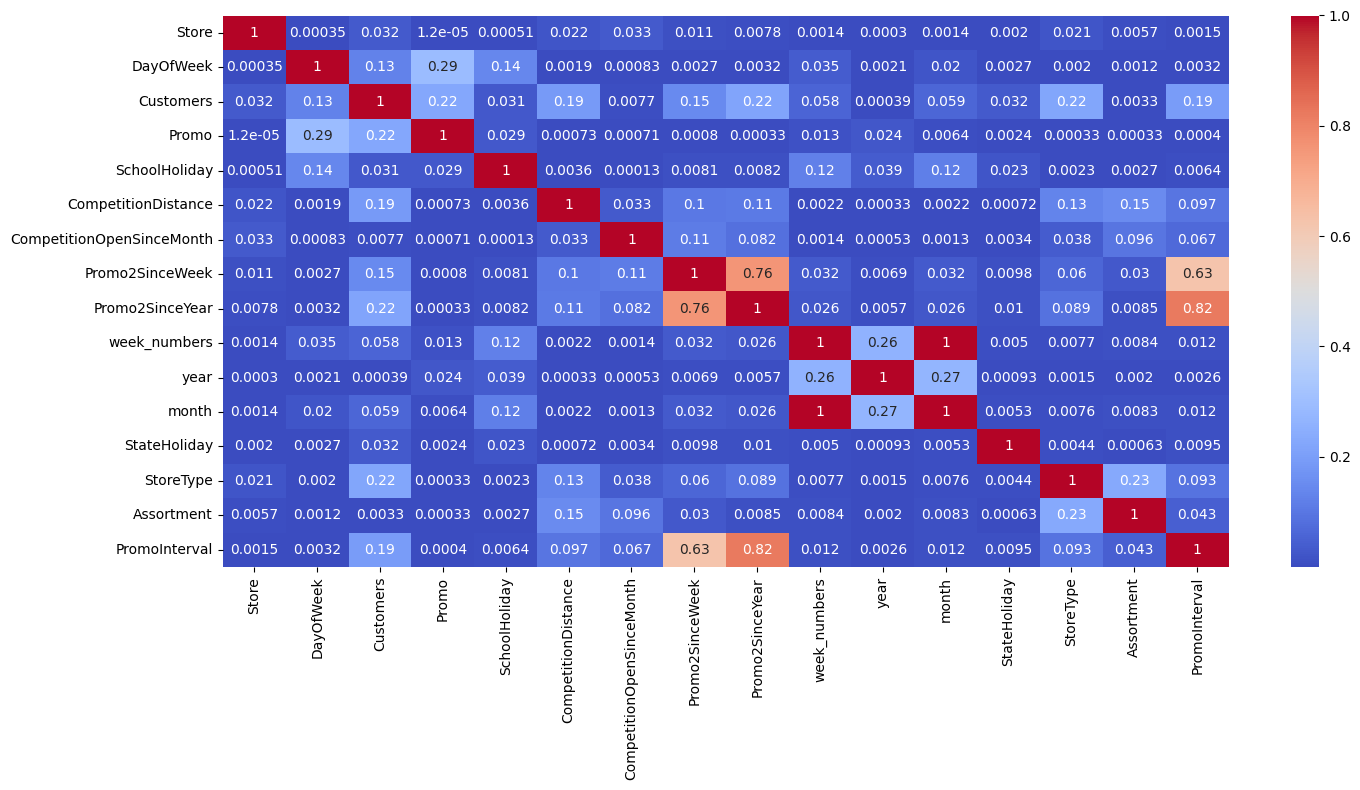

In [145]:
plt.figure(figsize=(15,8))
correlation = join_copy1[features].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [146]:
#Copied the numerical features into features variable
features = numerical_features.copy()
#extending the features variable with categorical columns
features.extend(['week_numbers','year','month','StateHoliday','StoreType','Assortment','PromoInterval'])

In [147]:
features.remove('Promo2SinceYear')

<Axes: >

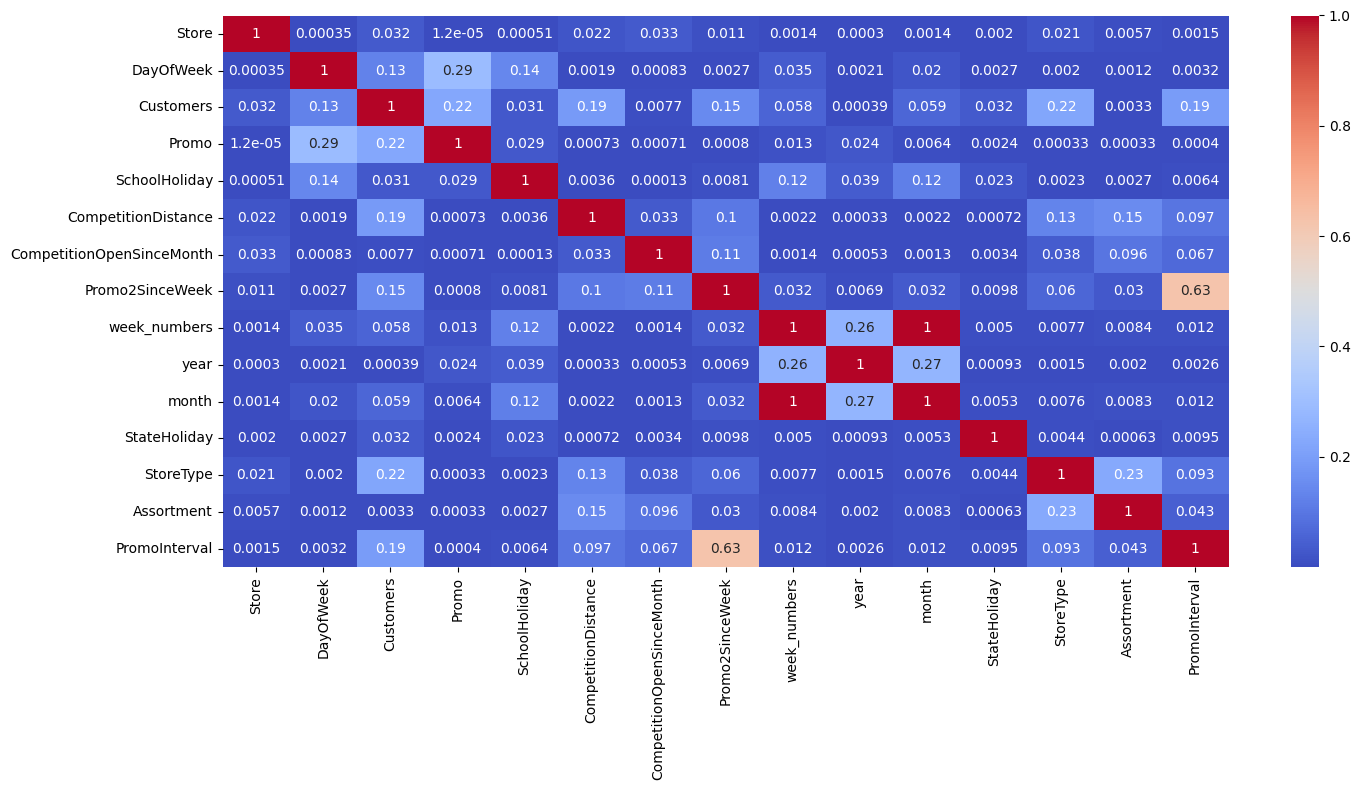

In [148]:
plt.figure(figsize=(15,8))
correlation1 = join_copy1[features].corr()
sns.heatmap(abs(correlation1), annot=True, cmap='coolwarm')

In [154]:
features.remove('Promo2SinceWeek')

In [155]:
features.remove('month')

<Axes: >

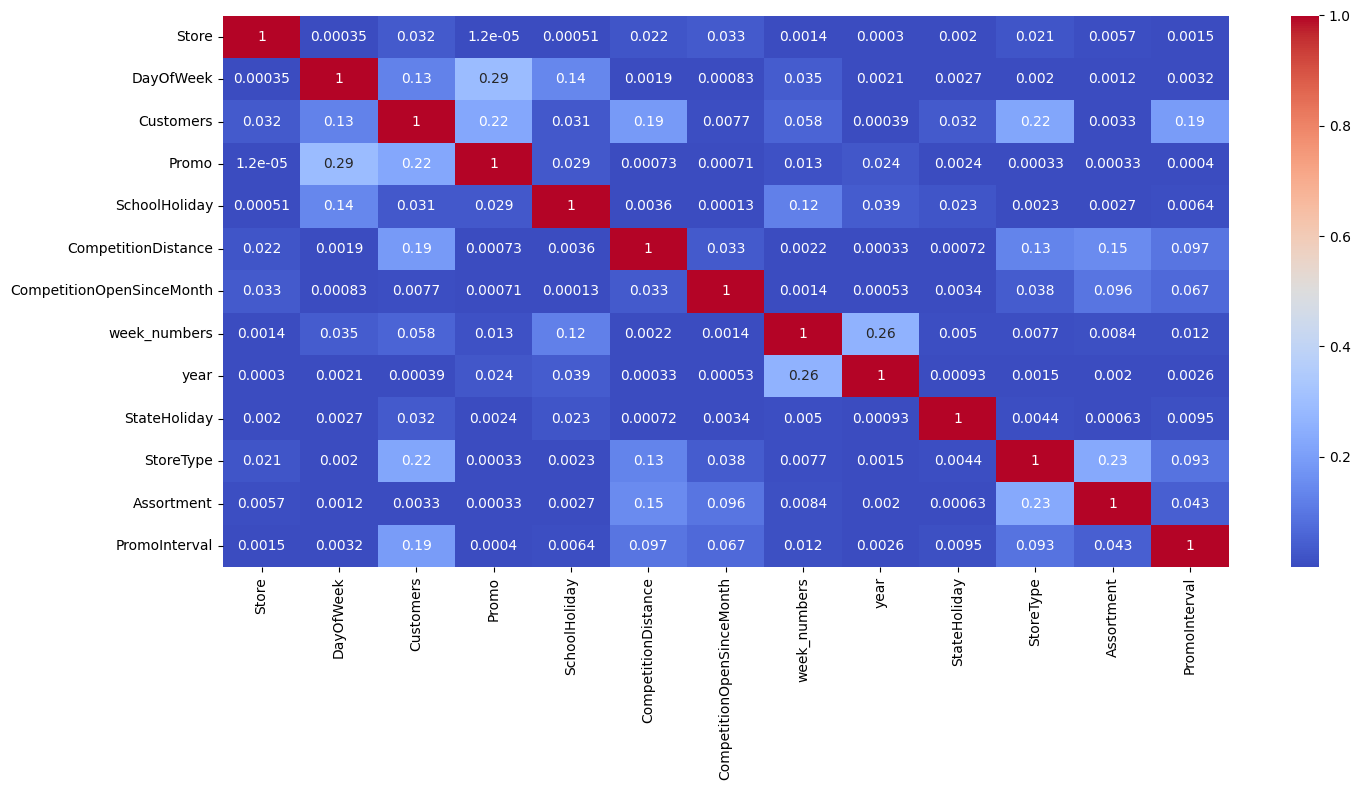

In [156]:
plt.figure(figsize=(15,8))
correlation1 = join_copy1[features].corr()
sns.heatmap(abs(correlation1), annot=True, cmap='coolwarm')

In [157]:
features

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'week_numbers',
 'year',
 'StateHoliday',
 'StoreType',
 'Assortment',
 'PromoInterval']

In [159]:
join_copy1[features]

,Store,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,week_numbers,year,StateHoliday,StoreType,Assortment,PromoInterval
0,1,5,555,1,1.0,1270.0,9.0,30,2015,0,3,1,0
1,1,4,546,1,1.0,1270.0,9.0,30,2015,0,3,1,0
2,1,3,523,1,1.0,1270.0,9.0,30,2015,0,3,1,0
3,1,2,560,1,1.0,1270.0,9.0,30,2015,0,3,1,0
4,1,1,612,1,1.0,1270.0,9.0,30,2015,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,1002,1,0.0,1100.0,6.0,1,2013,0,1,1,0
844388,292,6,340,0,0.0,1100.0,6.0,0,2013,0,1,1,0
844389,292,5,560,0,1.0,1100.0,6.0,0,2013,0,1,1,0
844390,292,4,662,0,1.0,1100.0,6.0,0,2013,0,1,1,0


In [160]:
#applying zscore on all the column names in features variable
from scipy.stats import zscore
X = join_copy1[features].apply(zscore)
print(X)

           Store  DayOfWeek  Customers     Promo  SchoolHoliday  \
0      -1.732571   0.858414  -0.593037  1.113726       2.041038   
1      -1.732571   0.278263  -0.621542  1.113726       2.041038   
2      -1.732571  -0.301888  -0.694388  1.113726       2.041038   
3      -1.732571  -0.882040  -0.577201  1.113726       2.041038   
4      -1.732571  -1.462191  -0.412507  1.113726       2.041038   
...          ...        ...        ...       ...            ...   
844387 -0.828090  -1.462191   0.822700  1.113726      -0.489947   
844388 -0.828090   1.438566  -1.273985 -0.897887      -0.489947   
844389 -0.828090   0.858414  -0.577201 -0.897887       2.041038   
844390 -0.828090   0.278263  -0.254147 -0.897887       2.041038   
844391 -0.828090  -0.301888  -0.222475 -0.897887       2.041038   

        CompetitionDistance  CompetitionOpenSinceMonth  week_numbers  \
0                 -0.626899                   0.950941      0.486821   
1                 -0.626899                   0.950

In [161]:
join_copy1.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'week_numbers', 'year', 'month', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [162]:
#applying log transformation on sales column data to remove skewness
y = np.log10(join_copy1['Sales'])
print(np.log10(y))

0         0.570687
1         0.568284
2         0.565802
3         0.568193
4         0.578120
            ...   
844387    0.598578
844388    0.536434
844389    0.559123
844390    0.563584
844391    0.568849
Name: Sales, Length: 844392, dtype: float64


In [163]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 13)
(168879, 13)


In [164]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test= std.transform(X_test)

### ML Model - 1

In [165]:
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train.fillna(0, inplace=True)

In [166]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)
#We are calculating the regressor coefficient and score
print(reg.coef_)
print(reg.score(X_train, y_train))
# Predict on the model
y_pred = reg.predict(X_test)
print(y_pred)

[-0.00370348 -0.00495922  0.14871924  0.0389124   0.00145953  0.01883239
  0.00017163  0.00625406  0.00951654 -0.00353594  0.03170619  0.0113617
  0.00491397]
0.7508272404226868
[3.8168429  3.72487983 3.901633   ... 3.78086541 3.96986833 3.76202919]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [167]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2172835.7637761766
RMSE : 1474.0541929577


In [168]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7311684228697075
Adjusted R2 :  0.7311477269854053


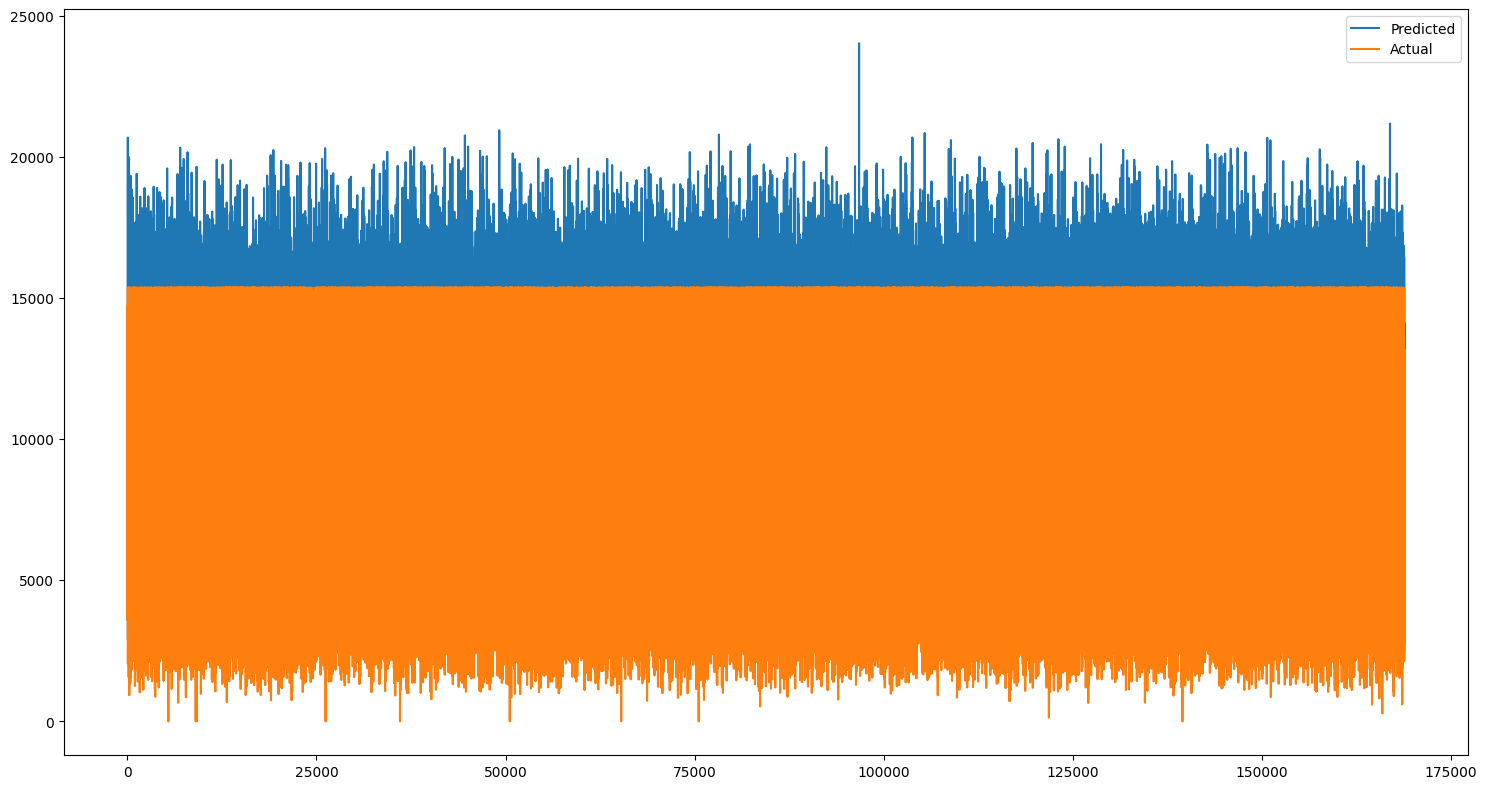

In [169]:
#We are plotting the prediction verses actual graph
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [170]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [171]:
# ML Model - 1 Implementation
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)
# Fit the Algorithm
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [172]:
#We are calculating the lasso score
lasso.score(X_train, y_train)

0.34355341144181295

In [173]:
# Predict on the model
y_pred_l = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [174]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 5437160.915723439
RMSE : 2331.772054838002
R2 : 0.3272935909592818
Adjusted R2 :  0.3272418029433073


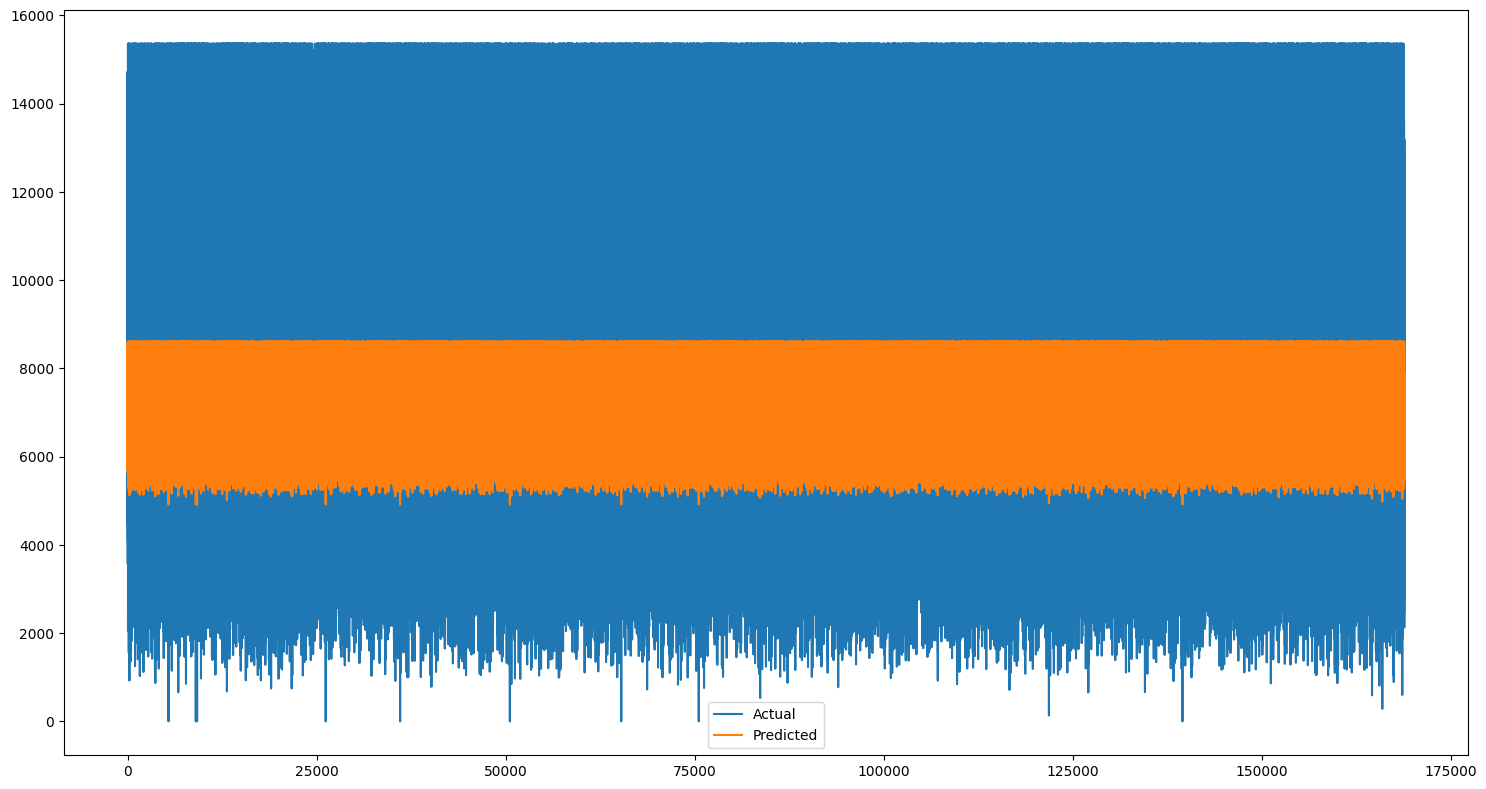

In [175]:
#We are plotting the prediction verses actual graph
plt.figure(figsize=(15,8))
plt.plot(np.array(10**(y_test)))
plt.plot(10**(y_pred_l))
plt.legend(["Actual","Predicted"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [176]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.008389233736131445


In [177]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2172835.7637761473
RMSE : 1474.0541929576902
R2 : 0.7311684228697111
Adjusted R2 :  0.7311477269854089


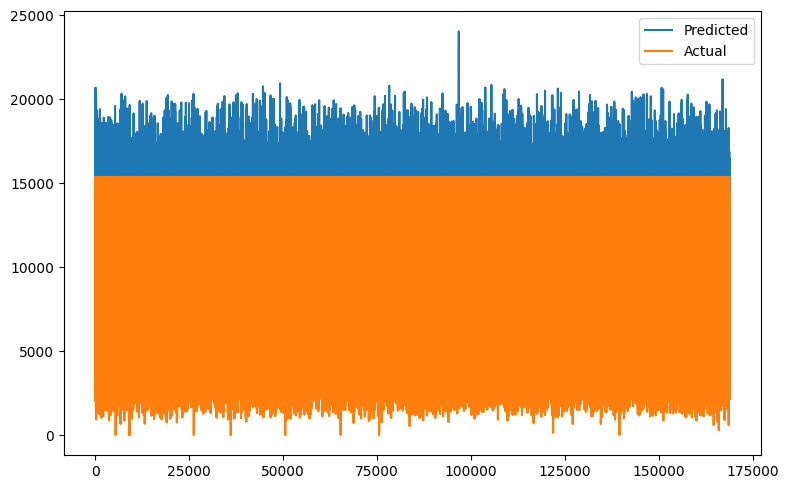

In [178]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearchCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For alpha=0.1 the adjusted R2 score was 0.3272 but after grid search CV the best alpha value is 1e-15 and for that adjusted R2 score is 0.7311

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### ML Model - 3

In [179]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
# Fit the Algorithm
print(ridge.score(X_train, y_train))
# Predict on the model
y_pred_r = ridge.predict(X_test)

0.7508272404226672


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [180]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2172835.182886425
RMSE : 1474.053995919561
R2 : 0.7311684947396162
Adjusted R2 :  0.7311477988608468


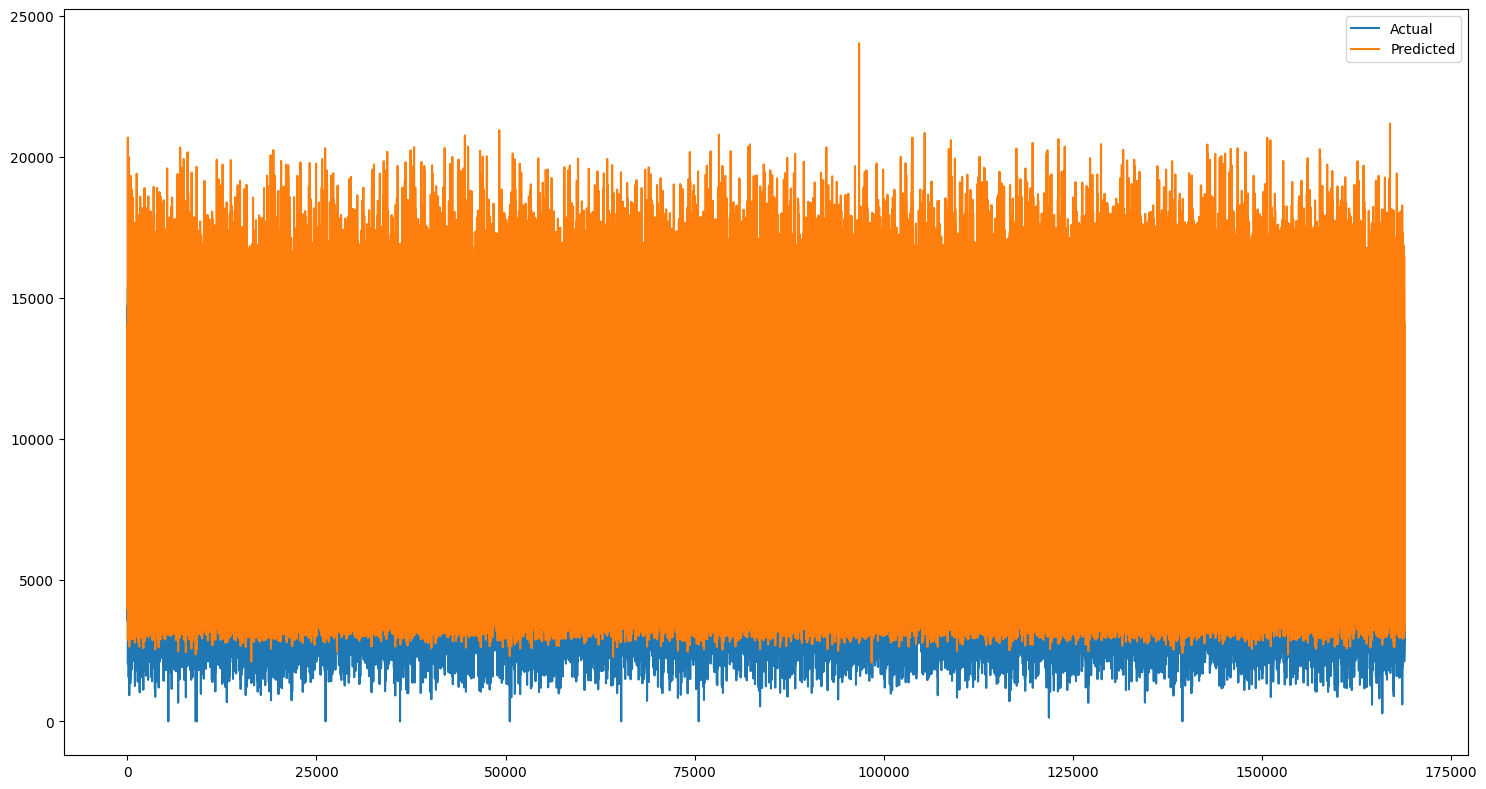

In [181]:
#We are plotting the prediction verses actual graph
plt.figure(figsize=(15,8))
plt.plot(np.array(10**(y_test)))
plt.plot(10**(y_pred_r))
plt.legend(["Actual","Predicted"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [182]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)
# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.008389233735665698


In [183]:
y_pred_ridge

array([3.81684286, 3.72487995, 3.90163293, ..., 3.78086524, 3.96986822,
       3.7620291 ])

In [184]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2172829.954928363
RMSE : 1474.0522225919824
R2 : 0.7311691415626456
Adjusted R2 :  0.7311484457336717


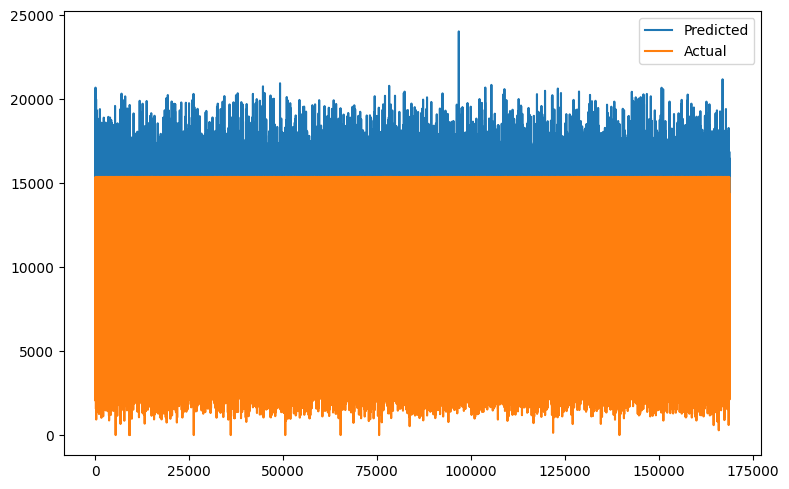

In [185]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearchCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No there was no improvement in adjusted R2 score for alpha 0.1 and alpha 1 which is the best alpha value after grid search CV. The adjusted R2 score for both is 0.7311

### ML Model - 4

In [186]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [187]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [188]:
elasticnet.score(X_train, y_train)

0.5596399849121756

In [189]:
y_pred_en = elasticnet.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [190]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3341846.667129182
RMSE : 1828.0718440830442
R2 : 0.5865339088074337
Adjusted R2 :  0.5865020782967565


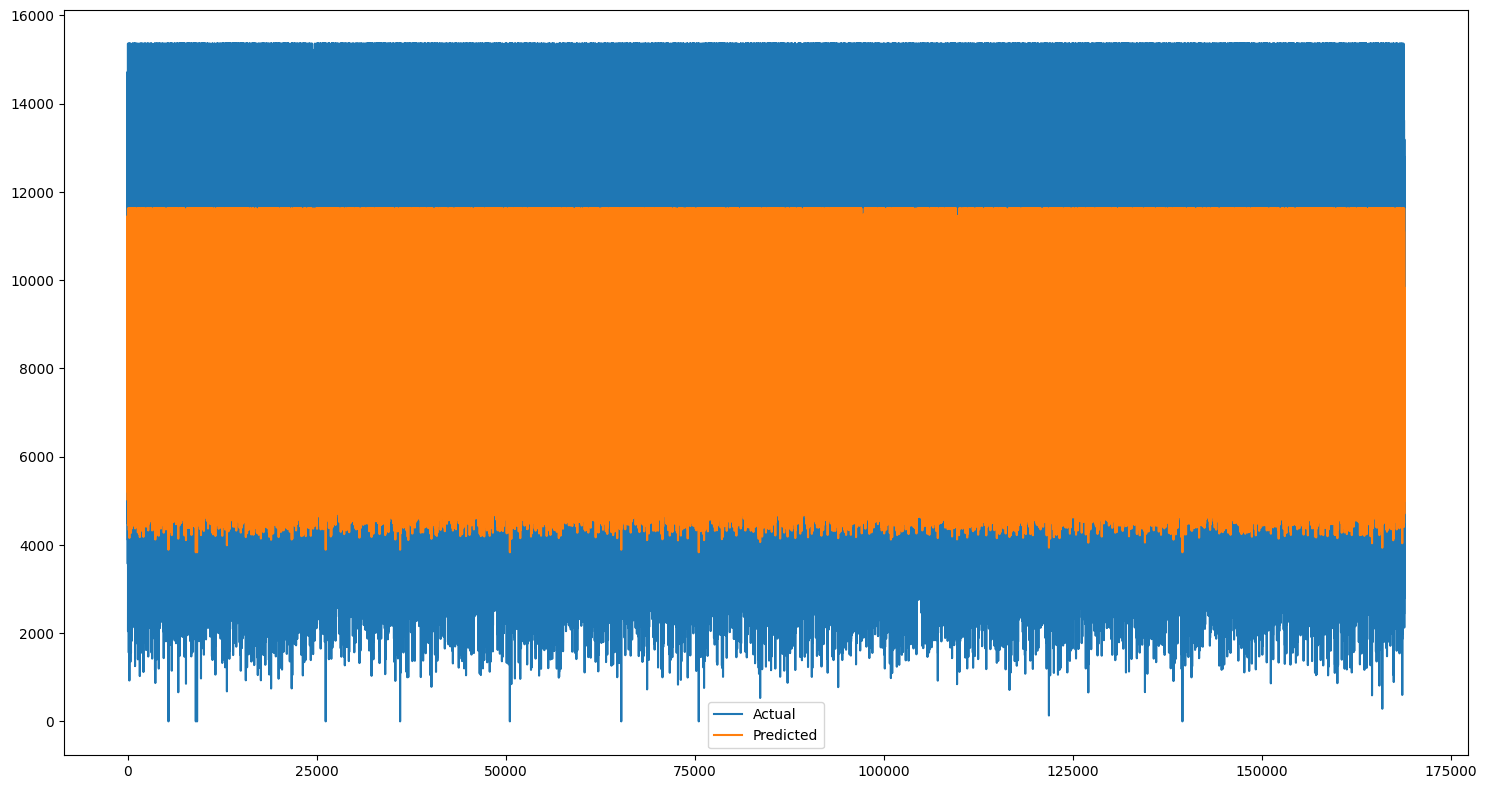

In [191]:
plt.figure(figsize=(15,8))
plt.plot(np.array(10**(y_test)))
plt.plot(10**(y_pred_en))
plt.legend(["Actual","Predicted"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [192]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [193]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [194]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.8}

Using  {'alpha': 1e-08, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.008389277555622486


In [195]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2172835.5417367727
RMSE : 1474.0541176418092
R2 : 0.7311684503412743
Adjusted R2 :  0.731147754459087


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearchCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For alpha=0.1, l1_ratio=0.5, we have adjusted R2 score of 0.5864 and on applying grid search CV the best param is 'alpha': 1e-08, 'l1_ratio': 0.3 now we have adjusted R2 score of 0.7311 which is a improvement.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We can choose any model as we are getting adjusted R2 score same in all the model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [196]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [197]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1) The rise or fall of sales is not constant for wide range of rossmann stores which says it is not the question of brand which comes but individual stores having parameters affecting individually like locality.

2) It is good to have 8000 sales but we should be prepared to have stock for higher sales than it and also manage to be able to retain the stock if the sales fall down.

3) It is good to be prepared for having sales around 6000 that is even if sales goes down or up the store should be able handle customers.

4) The stores might be affected by locality and brand might not be the reason affecting the stores sale individually. Locality means how popular the store are in the region comparatively to there nearest competition brand, rumour about the store and discounts offered by the competition brand store.

5) The ending month that is December of year 2013 and 2014 was having maximum sales. Rest of the months are not showing any significant pattern which can tell us about seasonality but december as it is a start of winter in Europe may be the cause of cold because of which customers are visiting the stores.

6) B customer slot category that is 500 to 1000 customers has the max number of Sales daily and on yearly basis

7) We can see in each year when there is no state holiday, the sales sum is very high related to when there is a state holiday. And as we are reaching to year 2015 the sales are droping.

8) We are having negative impact on the business as the sales are going down year by year and the reason for it may be brand getting affected by some external reasons.

9) By comparing the school holiday and state holiday to sales that on days of no state holiday and having school holiday there might be sales but during state holiday's the sales are close to no sales.

10) The sales are increasing when we are having promotion comparatively to no promotion. And from August till december monthly sum of sales have fallen down.

11) B customer category has contributed to maximum sales and the promotion has also contributed to increase of sales.

12) The promotions are having good impact on business during few months but there are also days when promotions are not working well.

13) As the competition distance is increasing the sales is continue to decrease which shows that when the nearest competition is not much distance away the sales are maximimum which also says the locality is crowded of such stores.

14) As distance from nearest competition is becoming smaller the sales are increasing.

15) We have not found any particular pattern in the sales of the months which is repetitive but the december month is having max sales compared to rest of the months of respective year.

16) B customer slot category that is 500 to 1000 customers has the max sales in each year and consecutive promotion are not playing important role in the sales.

17) The consecutive promotion are not having any significant role to play in sales of the year.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***